
# Mental Health in Tech — Cleaning + Analysis


- First section: Cleaning and Normalization
- Second section: Analysis and Visualizations


## 1) Cleaning & Normalization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mental-Health.csv", on_bad_lines='skip') # Removes rows that had formatting issues
pd.set_option('display.max_columns', None)

# Filter the dataframe for rows where the 'Country' is 'United States'
united = df[df['Country'] == 'United States']

# Check unique values in the 'Country' column
print(df['Country'].unique())



["'United States'" 'Canada' "'United Kingdom'" 'Bulgaria' 'France'
 'Portugal' 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany'
 'Russia' 'Mexico' 'Brazil' 'Slovenia' "'Costa Rica'" 'Austria' 'Ireland'
 'India' "'South Africa'" 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' "'New Zealand'" 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 "'Bosnia and Herzegovina'" 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' "'Czech Republic'" 'Philippines']


In [5]:
value_counts = {col: df[col].value_counts() for col in df.columns}
value_counts

{'Timestamp': Timestamp
 '2014-08-27 12:44:51'    2
 '2014-08-27 14:22:43'    2
 '2014-08-27 17:33:52'    2
 '2014-08-28 16:52:34'    2
 '2014-08-27 12:54:11'    2
                         ..
 '2014-08-27 15:35:21'    1
 '2014-08-27 15:34:32'    1
 '2014-08-27 15:34:31'    1
 '2014-08-27 15:34:23'    1
 '2016-02-01 23:04:31'    1
 Name: count, Length: 1244, dtype: int64,
 'Age': Age
  29             85
  32             82
  26             75
  27             71
  33             70
  28             68
  31             67
  34             65
  30             63
  25             61
  35             55
  23             51
  24             45
  37             43
  38             39
  36             37
  40             33
  39             33
  43             28
  22             21
  41             21
  42             20
  21             16
  45             12
  46             12
  44             11
  19              9
  18              7
  48              6
  50              6
  20          

In [6]:

df.sample(5)

df.shape # 1257 rows and 28 features in the dataset 

df.duplicated().sum() # There are no duplicates in the Dataset 

df.isnull().sum() # No null values found in the dataset

df.dtypes #check datatypes of features

Timestamp                     object
Age                            int64
Gender                        object
Country                       object
state                         object
self_employed                 object
family_history                object
treatment                     object
work_interfere                object
no_employees                  object
remote_work                   object
tech_company                  object
benefits                      object
care_options                  object
wellness_program              object
seek_help                     object
anonymity                     object
leave                         object
mental_health_consequence     object
phys_health_consequence       object
coworkers                     object
supervisor                    object
mental_health_interview       object
phys_health_interview         object
mental_vs_physical            object
obs_consequence               object
comments                      object
U

In [7]:

df.drop(columns=['Timestamp', 'Unnamed: 27', 'comments'], inplace = True)

df.columns

df.describe().T #min and max both show values that are impossible for age 


print(df['Age'].min())
print(df['Age'].max())

-1726
99999999999


In [8]:
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]

print(df['Age'].min())
print(df['Age'].max())

18
72


In [9]:
print(df['Gender'].nunique())

df['Gender'].value_counts()

45


Gender
Male                          612
male                          204
Female                        121
M                             116
female                         62
F                              38
m                              34
f                              15
Make                            4
Woman                           3
'Male '                         3
Man                             2
'Female '                       2
'Cis Male'                      2
'Female (trans)'                2
'cis male'                      1
'Guy (-ish) ^_^'                1
'male leaning androgynous'      1
femail                          1
msle                            1
'Trans woman'                   1
Mail                            1
Neuter                          1
queer                           1
Agender                         1
'Female (cis)'                  1
Malr                            1
cis-female/femme                1
Nah                             1
Androgy

In [10]:

# Normalzing Values in Gender 
df['Gender'] = df['Gender'].str.lower().str.strip()

male_variations = [
    'male', 'm', 'mail', 'mal', 'make', 'msle', 'cis male', "'male'",
    'guy (-ish) ^_^', 'male leaning androgynous', 'something kinda male?',
    'male (cis)', 'maile', 'male-ish', 'cis man'
]

female_variations = [
    'female', 'f', 'femake', 'femall', 'woman', 'trans woman',
    'female (trans)', 'female (cis)', 'trans-female', 'cis female'
]

def normalize_gender(g):
    if g in male_variations:
        return 'Male'
    elif g in female_variations:
        return 'Female'
    else:
        return 'Non-Binary'

df['Gender'] = df['Gender'].apply(normalize_gender)

In [11]:

df['Gender'].unique() 

array(['Female', 'Male', 'Non-Binary'], dtype=object)

In [12]:

df['Country'].describe() 

print(df['Country'].unique()) #All the Distinct Countries listed in the dataset

df.sample(5)

print(df['no_employees'].unique())
print(df['coworkers'].unique())
print(df['state'].unique())

["'United States'" 'Canada' "'United Kingdom'" 'Bulgaria' 'France'
 'Portugal' 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany'
 'Russia' 'Mexico' 'Brazil' 'Slovenia' "'Costa Rica'" 'Austria' 'Ireland'
 'India' "'South Africa'" 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' "'New Zealand'" 'Spain' 'Finland' 'Uruguay' 'Israel'
 "'Bosnia and Herzegovina'" 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' "'Czech Republic'" 'Philippines']
['6-25' "'More than 1000'" '26-100' '100-500' '1-5' '500-1000']
["'Some of them'" 'No' 'Yes']
['IL' 'IN' '?' 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


In [13]:

us_state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia',
    '?': 'Not Applicable'
}
df['state'] = df['state'].str.strip() #Remove any extra white spaces 
df['state'] = df['state'].map(us_state_map) #Maps new values

In [14]:

print(df['state'].unique())

['Illinois' 'Indiana' 'Not Applicable' 'Texas' 'Tennessee' 'Michigan'
 'Ohio' 'California' 'Connecticut' 'Maryland' 'New York' 'North Carolina'
 'Massachusetts' 'Iowa' 'Pennsylvania' 'Washington' 'Wisconsin' 'Utah'
 'New Mexico' 'Oregon' 'Florida' 'Minnesota' 'Missouri' 'Arizona'
 'Colorado' 'Georgia' 'District of Columbia' 'Nebraska' 'West Virginia'
 'Oklahoma' 'Kansas' 'Virginia' 'New Hampshire' 'Kentucky' 'Alabama'
 'Nevada' 'New Jersey' 'South Carolina' 'Vermont' 'South Dakota' 'Idaho'
 'Mississippi' 'Rhode Island' 'Wyoming' 'Louisiana' 'Maine']


In [15]:
df['work_interfere'].unique()

df['work_interfere'].replace('?', 'No Answer Provided', inplace=True)

C:\Users\azhan\AppData\Local\Temp\ipykernel_24164\1121189263.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].replace('?', 'No Answer Provided', inplace=True)


In [16]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'No Answer Provided'],
      dtype=object)

In [17]:
df['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['family_history'].value_counts()

family_history
No     761
Yes    489
Name: count, dtype: int64

In [19]:
df.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [20]:
# Updating the 'mental_vs_physical' column to replace "'Don\\'t know'" with 'Unsure'
df['mental_vs_physical'] = df['mental_vs_physical'].replace("'Don\\'t know'", 'Unsure')

# Verifying the changes for each column separately
print(df['coworkers'].value_counts())
print(df['supervisor'].value_counts())
print(df['mental_health_interview'].value_counts())
print(df['phys_health_interview'].value_counts())
print(df['mental_vs_physical'].value_counts())
print(df['obs_consequence'].value_counts())


print(df['treatment'].value_counts())
print(df['seek_help'].value_counts())

coworkers
'Some of them'    771
No                257
Yes               222
Name: count, dtype: int64
supervisor
Yes               512
No                389
'Some of them'    349
Name: count, dtype: int64
mental_health_interview
No       1002
Maybe     207
Yes        41
Name: count, dtype: int64
phys_health_interview
Maybe    554
No       496
Yes      200
Name: count, dtype: int64
mental_vs_physical
Unsure    573
Yes       339
No        338
Name: count, dtype: int64
obs_consequence
No     1069
Yes     181
Name: count, dtype: int64
treatment
Yes    631
No     619
Name: count, dtype: int64
seek_help
No               641
'Don\'t know'    362
Yes              247
Name: count, dtype: int64


In [21]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['self_employed'].unique()

array(['?', 'Yes', 'No'], dtype=object)

In [23]:
df['self_employed'].replace('?', 'No Answer Provided', inplace=True)
df['self_employed'].unique()
df['self_employed'].value_counts()

C:\Users\azhan\AppData\Local\Temp\ipykernel_24164\1090483108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].replace('?', 'No Answer Provided', inplace=True)


self_employed
No                    1090
Yes                    142
No Answer Provided      18
Name: count, dtype: int64

In [24]:
df['no_employees'].unique()

array(['6-25', "'More than 1000'", '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [25]:
# Verifying the value count
print(df['no_employees'].value_counts())

no_employees
6-25                288
26-100              288
'More than 1000'    281
100-500             175
1-5                 158
500-1000             60
Name: count, dtype: int64


In [26]:
df['remote_work'].unique()
df['remote_work'].value_counts()

remote_work
No     879
Yes    371
Name: count, dtype: int64

In [27]:

df['tech_company'].unique()
df['tech_company'].value_counts()

tech_company
Yes    1025
No      225
Name: count, dtype: int64

In [28]:
df['benefits'].unique()

array(['Yes', "'Don\\'t know'", 'No'], dtype=object)

In [29]:
# Updating the 'benefits' column to replace "'Don\\'t know'" with 'Unsure'
df['benefits'] = df['benefits'].replace("'Don\\'t know'", 'Unsure')
print(df['benefits'].value_counts())

benefits
Yes       473
Unsure    406
No        371
Name: count, dtype: int64


In [30]:
print(df[['remote_work', 'work_interfere', 'mental_health_consequence']].value_counts())
#standardize the columns
df['remote_work'] = df['remote_work'].str.lower().str.strip()
print(df['remote_work'])
df['mental_health_consequence'] = df['mental_health_consequence'].str.lower().str.strip()
print(df['mental_health_consequence'])
df['work_interfere'] = df['work_interfere'].str.lower().str.strip()
print(df['work_interfere'])

remote_work  work_interfere      mental_health_consequence
No           Sometimes           Maybe                        135
             No Answer Provided  No                            97
             Sometimes           Yes                           96
                                 No                            89
             No Answer Provided  Maybe                         77
             Never               No                            73
                                 Maybe                         59
Yes          Sometimes           No                            56
                                 Maybe                         50
No           Rarely              No                            48
                                 Maybe                         44
Yes          No Answer Provided  No                            37
             Sometimes           Yes                           37
No           Often               Maybe                         37
                 

In [31]:
#View columns
df.loc[:, "care_options":"phys_health_consequence"]

,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence
0,'Not sure',No,Yes,Yes,'Somewhat easy',no,No
1,No,'Don\'t know','Don\'t know','Don\'t know','Don\'t know',maybe,No
2,No,No,No,'Don\'t know','Somewhat difficult',no,No
3,Yes,No,No,No,'Somewhat difficult',yes,Yes
4,No,'Don\'t know','Don\'t know','Don\'t know','Don\'t know',no,No
...,...,...,...,...,...,...,...
1252,No,No,No,'Don\'t know','Somewhat easy',no,No
1253,Yes,No,No,Yes,'Somewhat difficult',no,No
1254,Yes,No,No,'Don\'t know','Somewhat difficult',yes,Yes
1255,Yes,No,No,'Don\'t know','Don\'t know',yes,No


In [32]:
print(df.loc[:, "care_options":"phys_health_consequence"].apply(pd.Series.value_counts))

                      care_options  wellness_program  seek_help  anonymity  \
'Don\'t know'                  NaN             187.0      362.0      814.0   
'Not sure'                   313.0               NaN        NaN        NaN   
'Somewhat difficult'           NaN               NaN        NaN        NaN   
'Somewhat easy'                NaN               NaN        NaN        NaN   
'Very difficult'               NaN               NaN        NaN        NaN   
'Very easy'                    NaN               NaN        NaN        NaN   
Maybe                          NaN               NaN        NaN        NaN   
No                           498.0             836.0      641.0       64.0   
Yes                          439.0             227.0      247.0      372.0   
maybe                          NaN               NaN        NaN        NaN   
no                             NaN               NaN        NaN        NaN   
yes                            NaN               NaN        NaN 

In [33]:
#Commented the output of each line

df['care_options'].unique()  # 'Not sure'", 'No', 'Yes'

df['wellness_program'].unique() # 'No', "'Don\\'t know'", 'Yes'

df['seek_help'].unique() # 'Yes', "'Don\\'t know'", 'No'

df['anonymity'].unique() #'Yes', "'Don\\'t know'", 'No'

df['leave'].unique() # "'Somewhat easy'", "'Don\\'t know'", "'Somewhat difficult'", "'Very difficult'", "'Very easy'

df['mental_health_consequence'].unique() # 'No', 'Maybe', 'Yes'

df['phys_health_consequence'].unique() # 'No', 'Maybe', 'Yes'

array(['No', 'Yes', 'Maybe'], dtype=object)

In [34]:
columns_to_clean = [
    'care_options', 'wellness_program', 'seek_help',
    'anonymity', 'leave', 'mental_health_consequence',
    'phys_health_consequence'
]


def clean_column(col):
    return (
        col.astype(str) 
        .str.strip() 
        .str.replace(r"^'+|'+$", '', regex=True)     # remove surrounding single quotes
        .str.replace(r"\\'", "'", regex=True)        # fix escaped single quotes
        .replace({"don't know": "Unsure", "dont know": "Unsure","do not know": "Unsure", "maybe": "Unsure"})
        .str.capitalize()
        )

# Apply cleaning
for col in columns_to_clean:
    df[col] = clean_column(df[col])

In [35]:
#View cleaned columns
df.loc[:, "care_options":"phys_health_consequence"]

,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence
0,Not sure,No,Yes,Yes,Somewhat easy,No,No
1,No,Don't know,Don't know,Don't know,Don't know,Unsure,No
2,No,No,No,Don't know,Somewhat difficult,No,No
3,Yes,No,No,No,Somewhat difficult,Yes,Yes
4,No,Don't know,Don't know,Don't know,Don't know,No,No
...,...,...,...,...,...,...,...
1252,No,No,No,Don't know,Somewhat easy,No,No
1253,Yes,No,No,Yes,Somewhat difficult,No,No
1254,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes
1255,Yes,No,No,Don't know,Don't know,Yes,No


In [36]:
#Check new stats
print(df.loc[:, "care_options":"phys_health_consequence"].apply(pd.Series.value_counts))

                    care_options  wellness_program  seek_help  anonymity  \
Don't know                   NaN             187.0      362.0      814.0   
Maybe                        NaN               NaN        NaN        NaN   
No                         498.0             836.0      641.0       64.0   
Not sure                   313.0               NaN        NaN        NaN   
Somewhat difficult           NaN               NaN        NaN        NaN   
Somewhat easy                NaN               NaN        NaN        NaN   
Unsure                       NaN               NaN        NaN        NaN   
Very difficult               NaN               NaN        NaN        NaN   
Very easy                    NaN               NaN        NaN        NaN   
Yes                        439.0             227.0      247.0      372.0   

                    leave  mental_health_consequence  phys_health_consequence  
Don't know          560.0                        NaN                      NaN  
May

In [37]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_mental_health_in_tech.csv", index=False)
print("✅ Cleaned data saved to 'cleaned_mental_health_in_tech.csv'")


✅ Cleaned data saved to 'cleaned_mental_health_in_tech.csv'


In [38]:
# `df` is already defined in cleaning
try:
    df
except NameError:
    try:
        df = df.copy()
    except Exception:
        pass


## 2) Analysis & Visualization

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Reusing in-memory cleaned dataframe
# df is already defined from cleaning
df.rename(columns={'no_employees': 'company_size'}, inplace=True)
  #rename no_employees
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,company_size,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,'United States',Illinois,No Answer Provided,No,Yes,often,6-25,no,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,'Some of them',Yes,No,Maybe,Yes,No
1,44,Male,'United States',Indiana,No Answer Provided,No,No,rarely,'More than 1000',no,No,Unsure,No,Don't know,Don't know,Don't know,Don't know,Unsure,No,No,No,No,No,Unsure,No
2,32,Male,Canada,Not Applicable,No Answer Provided,No,No,rarely,6-25,no,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,'United Kingdom',Not Applicable,No Answer Provided,Yes,Yes,often,26-100,no,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,'Some of them',No,Maybe,Maybe,No,Yes
4,31,Male,'United States',Texas,No Answer Provided,No,No,never,100-500,yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,'Some of them',Yes,Yes,Yes,Unsure,No


## Demographics and Mental Health - Azhan 

In [43]:
df['company_size'].value_counts()

company_size
6-25                288
26-100              288
'More than 1000'    281
100-500             175
1-5                 158
500-1000             60
Name: count, dtype: int64

## Power Bi Dashboard

# 

## Employment Factors and Mental Health- Ayele

Question: Do remote workers report fewer mental health consequences at work?

--- Analysis for Question 1: Remote Work and Mental Health Consequences ---

Percentage of Mental Health Consequences by Remote Work:

| remote_work   | No    | Unsure   | Yes   |
|:--------------|:------|:---------|:------|
| no            | 37.77 | 40.05    | 22.18 |
| yes           | 41.78 | 33.42    | 24.8  |


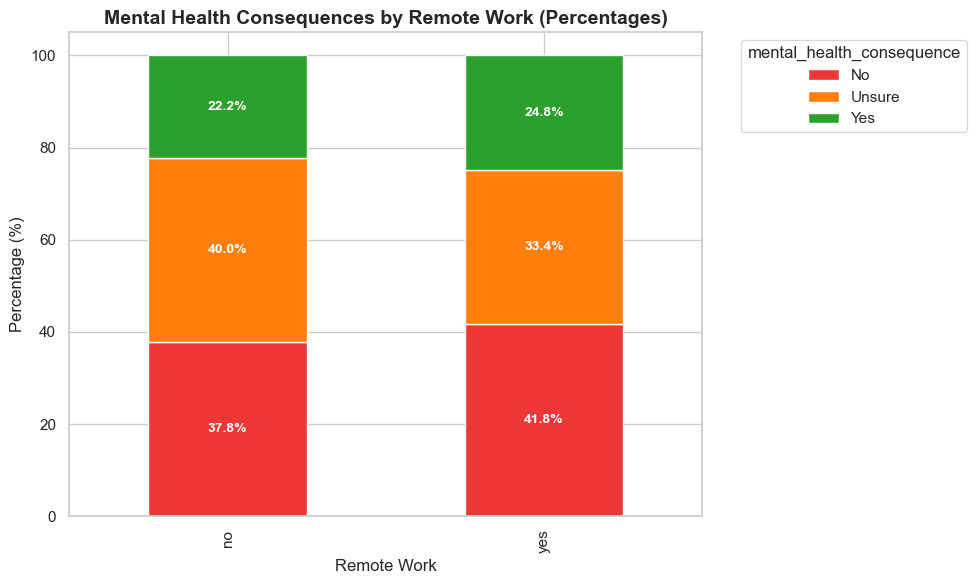

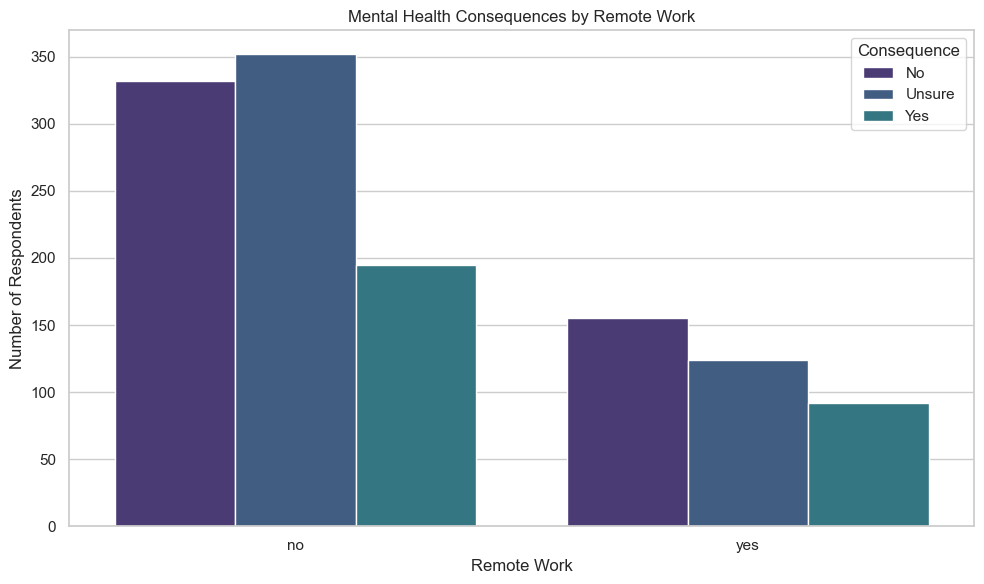

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style for plots
sns.set(style="whitegrid", palette="viridis")

# Load the dataset and preprocess the 'no_employees' column
# Reusing in-memory cleaned dataframe
# df is already defined from cleaning
df.rename(columns={'no_employees': 'company_size'}, inplace=True)

def plot_stacked_bar_percentage(data, title, xlabel, ylabel, ax):
    data.plot(kind='bar', color=['#ed3737', '#ff7f0e', '#2ca02c'], stacked=True, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.legend(title=data.columns.name, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add percentage labels on the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')


print("--- Analysis for Question 1: Remote Work and Mental Health Consequences ---")

# Filter data to include only relevant responses
df_q1 = df[df['remote_work'].isin(['yes', 'no']) & df['mental_health_consequence'].isin(['Yes', 'No', 'Unsure'])].copy()

# Calculate and print the percentage of mental health consequences by remote work
consequence_pct_remote = pd.crosstab(
    df_q1['remote_work'],
    df_q1['mental_health_consequence'],
    normalize='index'
) * 100

print("\nPercentage of Mental Health Consequences by Remote Work:\n")
print(consequence_pct_remote.round(2).to_markdown(numalign="left", stralign="left"))

# Visualize the relationship with a percentage-based stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
plot_stacked_bar_percentage(
    consequence_pct_remote,
    'Mental Health Consequences by Remote Work (Percentages)',
    'Remote Work',
    'Percentage (%)',
    ax
)
plt.tight_layout()
plt.show()

# Visualize the relationship with a count plot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_q1,
    x='remote_work',
    hue='mental_health_consequence',
    order=['no', 'yes']
)
plt.title('Mental Health Consequences by Remote Work')
plt.xlabel('Remote Work')
plt.ylabel('Number of Respondents')
plt.legend(title='Consequence')
plt.tight_layout()
plt.show()

Is self-employment associated with different mental health trends?



--- Analysis for Question 2: Self-Employment and Mental Health Trends ---

Percentage of Mental Health Treatment by Self-Employment:

| self_employed   | No    | Yes   |
|:----------------|:------|:------|
| No              | 49.82 | 50.18 |
| Yes             | 47.18 | 52.82 |

Percentage of Mental Health Consequences by Self-Employment:

| self_employed   | No    | Unsure   | Yes   |
|:----------------|:------|:---------|:------|
| No              | 37.16 | 39.27    | 23.58 |
| Yes             | 50    | 30.28    | 19.72 |


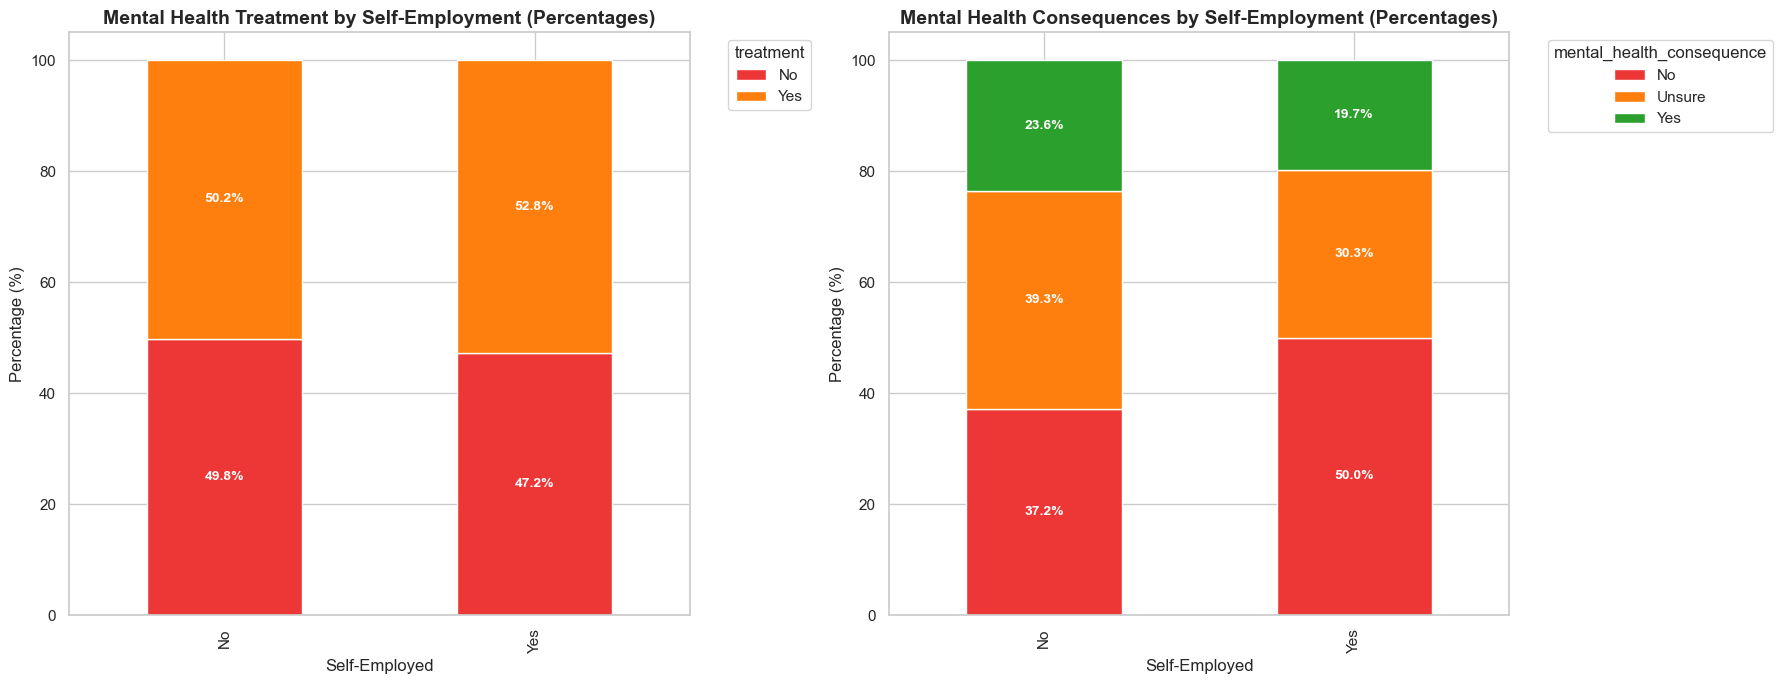

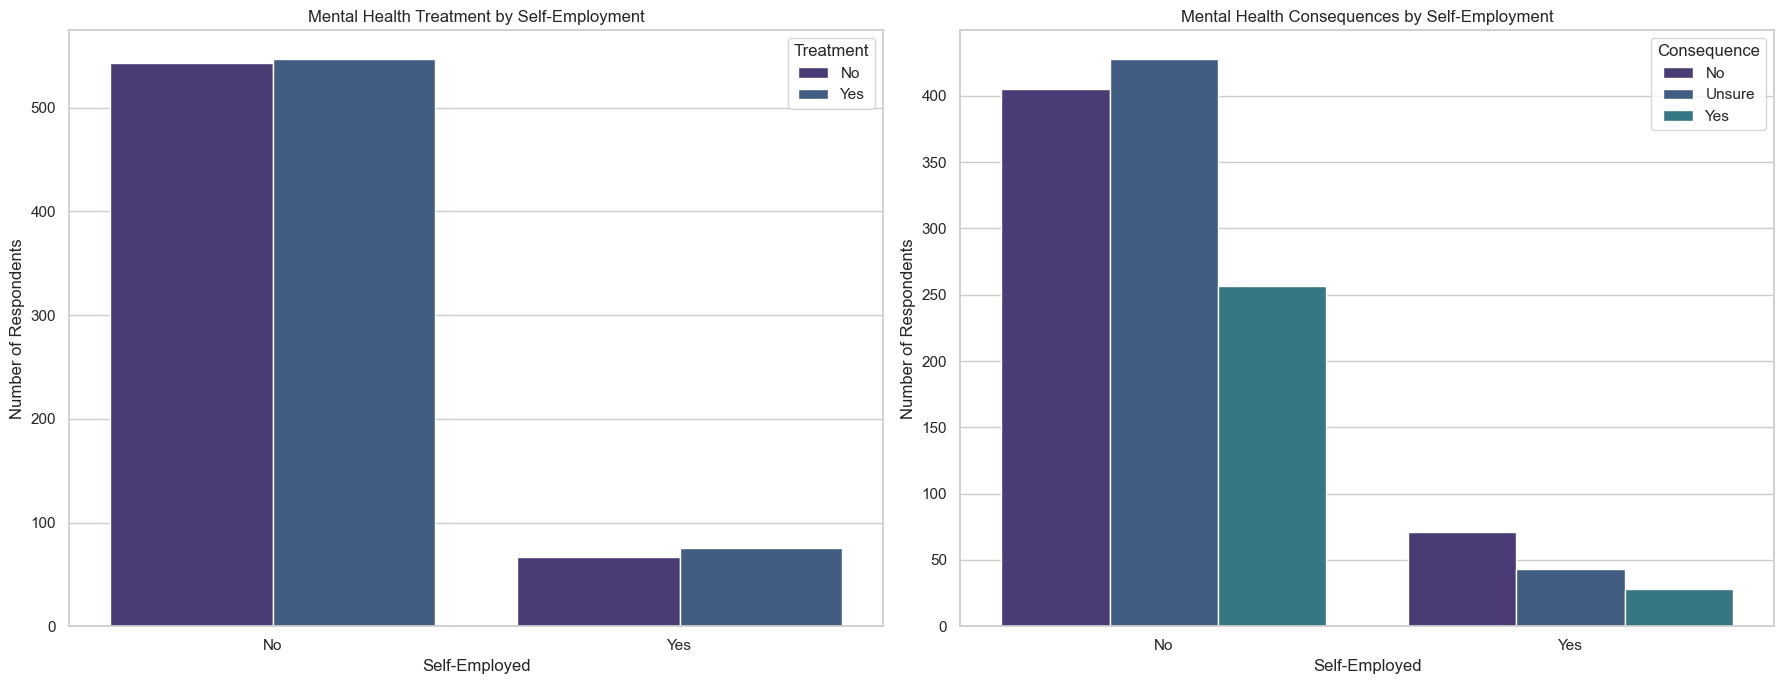

In [50]:
# Question 2: Is self-employment associated with different mental health trends?

print("\n\n--- Analysis for Question 2: Self-Employment and Mental Health Trends ---")
# Filter out 'No Answer Provided' from the self_employed column
df_q2 = df[df['self_employed'] != 'No Answer Provided'].copy()

# Calculate and print the percentage of mental health treatment by self-employment
treatment_pct_self_employed = pd.crosstab(
    df_q2['self_employed'],
    df_q2['treatment'],
    normalize='index'
) * 100

print("\nPercentage of Mental Health Treatment by Self-Employment:\n")
print(treatment_pct_self_employed.round(2).to_markdown(numalign="left", stralign="left"))

# Calculate and print the percentage of consequences by self-employment
consequence_pct_self_employed = pd.crosstab(
    df_q2['self_employed'],
    df_q2['mental_health_consequence'],
    normalize='index'
) * 100

print("\nPercentage of Mental Health Consequences by Self-Employment:\n")
print(consequence_pct_self_employed.round(2).to_markdown(numalign="left", stralign="left"))

# Create subplots to visualize both relationships with percentage-based charts
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plot_stacked_bar_percentage(
    treatment_pct_self_employed,
    'Mental Health Treatment by Self-Employment (Percentages)',
    'Self-Employed',
    'Percentage (%)',
    axes[0]
)
plot_stacked_bar_percentage(
    consequence_pct_self_employed,
    'Mental Health Consequences by Self-Employment (Percentages)',
    'Self-Employed',
    'Percentage (%)',
    axes[1]
)
plt.tight_layout()
plt.show()

# Create fresh subplot space before plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Treatment plot
sns.countplot(
    data=df_q2,
    x='self_employed',
    hue='treatment',
    order=['No', 'Yes'],
    ax=axes[0]
)
axes[0].set_title('Mental Health Treatment by Self-Employment')
axes[0].set_xlabel('Self-Employed')
axes[0].set_ylabel('Number of Respondents')
axes[0].legend(title='Treatment')

# Consequence plot
sns.countplot(
    data=df_q2,
    x='self_employed',
    hue='mental_health_consequence',
    order=['No', 'Yes'],
    hue_order=['No', 'Unsure', 'Yes'],
    ax=axes[1]
)
axes[1].set_title('Mental Health Consequences by Self-Employment')
axes[1].set_xlabel('Self-Employed')
axes[1].set_ylabel('Number of Respondents')
axes[1].legend(title='Consequence')

plt.tight_layout()
plt.show()

Does company size influence access to mental health resources?


--- Analysis: Does company size influence access to mental health resources? ---

Percentage of Mental Health Benefits by Company Size:

| company_size   | No    | Unsure   | Yes   |
|:---------------|:------|:---------|:------|
| 1-5            | 68.99 | 20.25    | 10.76 |
| 6-25           | 45.83 | 33.68    | 20.49 |
| 26-100         | 25.35 | 39.58    | 35.07 |
| 100-500        | 18.29 | 36.57    | 45.14 |
| 500-1000       | 6.67  | 35       | 58.33 |
| More than 1000 | 7.47  | 27.76    | 64.77 |

Percentage of Wellness Programs by Company Size:

| company_size   | Don't know   | No    | Yes   |
|:---------------|:-------------|:------|:------|
| 1-5            | 12.66        | 75.95 | 11.39 |
| 6-25           | 7.64         | 86.46 | 5.9   |
| 26-100         | 13.54        | 72.57 | 13.89 |
| 100-500        | 19.43        | 65.71 | 14.86 |
| 500-1000       | 15           | 56.67 | 28.33 |
| More than 1000 | 22.42        | 38.79 | 38.79 |


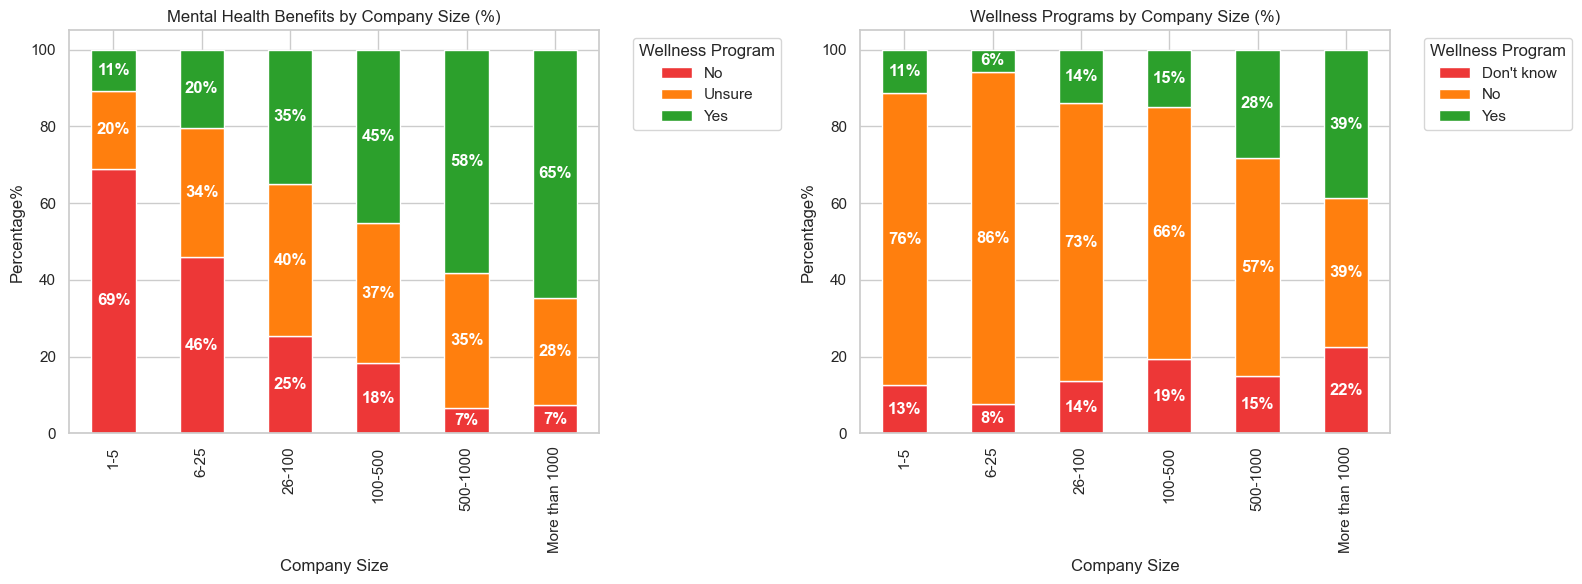

In [52]:
# Clean up company_size values
df['company_size'] = df['company_size'].replace("'More than 1000'", "More than 1000")

# Define correct order
company_size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
df['company_size'] = pd.Categorical(df['company_size'], categories=company_size_order, ordered=True)

print("\n--- Analysis: Does company size influence access to mental health resources? ---")

# --- Benefits by company size ---
benefits_pct = pd.crosstab(
    df['company_size'],
    df['benefits'],
    normalize='index'
) * 100

print("\nPercentage of Mental Health Benefits by Company Size:\n")
print(benefits_pct.round(2).to_markdown(numalign="left", stralign="left"))

# --- Wellness programs by company size ---
wellness_pct = pd.crosstab(
    df['company_size'],
    df['wellness_program'],
    normalize='index'
) * 100

print("\nPercentage of Wellness Programs by Company Size:\n")
print(wellness_pct.round(2).to_markdown(numalign="left", stralign="left"))

# Define your custom bright colors
custom_colors = ['#ed3737', '#ff7f0e', '#2ca02c']  # red, orange, green

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mental health benefits
benefits_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color=custom_colors
)
axes[0].set_title("Mental Health Benefits by Company Size (%)")
axes[0].set_xlabel("Company Size")
axes[0].set_ylabel("Percentage%")

axes[0].legend(title="Wellness Program", bbox_to_anchor=(1.05, 1), loc='upper left')


for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f%%', label_type='center', color='white', fontweight='bold')

# Wellness programs
wellness_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],
    color=custom_colors
)
axes[1].set_title("Wellness Programs by Company Size (%)")
axes[1].set_xlabel("Company Size")
axes[1].set_ylabel("Percentage%")
axes[1].legend(title="Wellness Program", bbox_to_anchor=(1.05, 1), loc='upper left')


for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f%%', label_type='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [53]:
# Fix category names consistently
df['company_size'] = df['company_size'].replace("'More than 1000'", "More than 1000")

# Define correct order including 'More than 1000'
company_size_order = pd.Categorical(
    df['company_size'],
    categories=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    ordered=True
)

df['company_size'] = company_size_order

# Now when you group or print, it will keep the correct order
print(df['company_size'].value_counts().sort_index())

company_size
1-5               158
6-25              288
26-100            288
100-500           175
500-1000           60
More than 1000    281
Name: count, dtype: int64




--- Analysis for Question 3: Company Size and Mental Health Resources ---

Percentage of Mental Health Benefits by Company Size:

| company_size   | No    | Unsure   | Yes   |
|:---------------|:------|:---------|:------|
| 1-5            | 68.99 | 20.25    | 10.76 |
| 6-25           | 45.83 | 33.68    | 20.49 |
| 26-100         | 25.35 | 39.58    | 35.07 |
| 100-500        | 18.29 | 36.57    | 45.14 |
| 500-1000       | 6.67  | 35       | 58.33 |
| More than 1000 | 7.47  | 27.76    | 64.77 |

Percentage of Care Options by Company Size:

| company_size   | No    | Not sure   | Yes   |
|:---------------|:------|:-----------|:------|
| 1-5            | 37.34 | 17.72      | 44.94 |
| 6-25           | 56.25 | 19.1       | 24.65 |
| 26-100         | 40.28 | 26.39      | 33.33 |
| 100-500        | 36.57 | 31.43      | 32    |
| 500-1000       | 36.67 | 30         | 33.33 |
| More than 1000 | 26.69 | 28.83      | 44.48 |


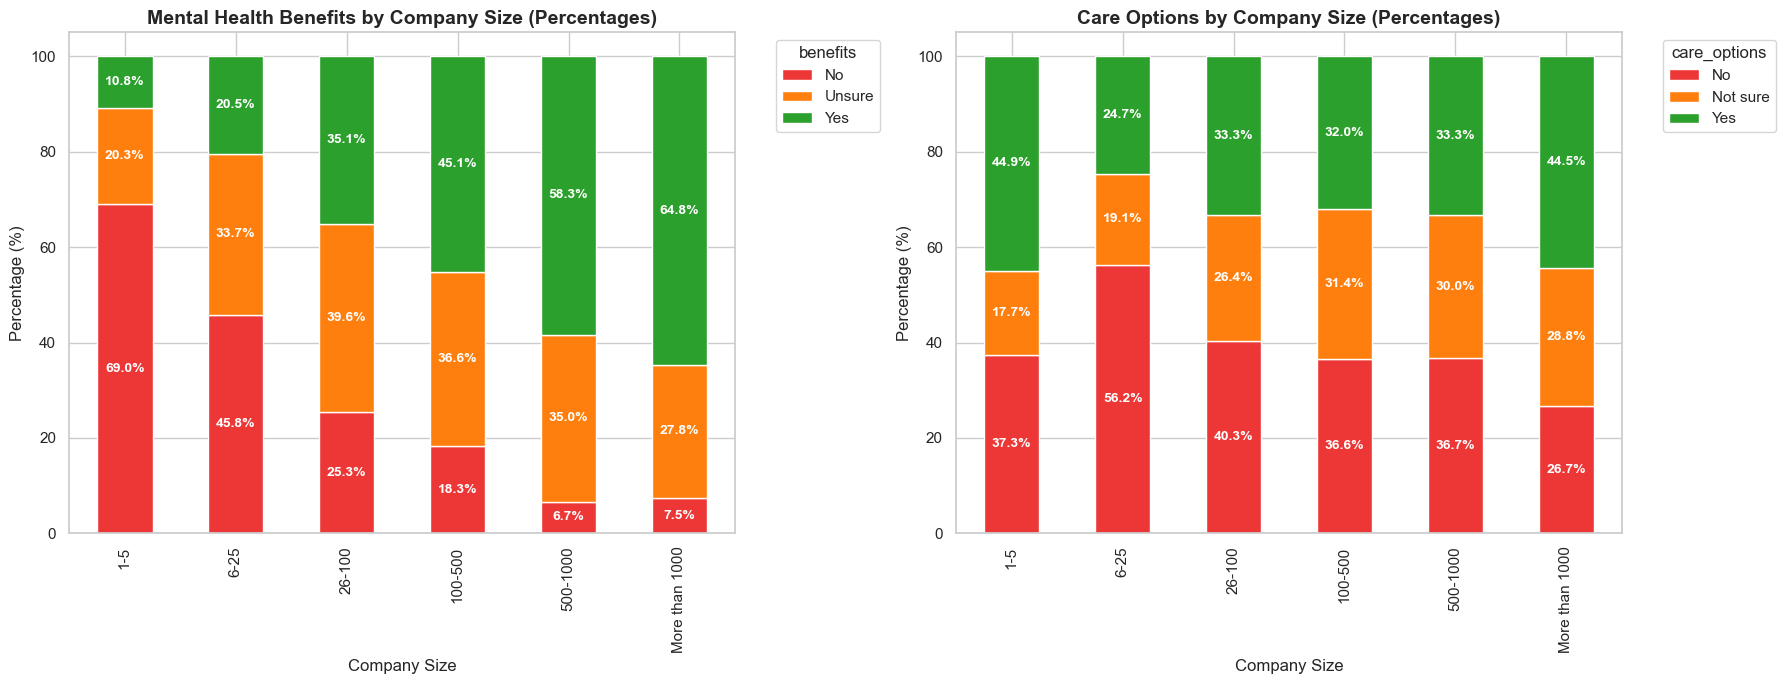

In [54]:
# Question 3: Does company size influence access to mental health resources?

print("\n\n--- Analysis for Question 3: Company Size and Mental Health Resources ---")

# Calculate and print the percentage of benefits by company size
benefits_pct = pd.crosstab(
    df['company_size'],
    df['benefits'],
    normalize='index'
) * 100

print("\nPercentage of Mental Health Benefits by Company Size:\n")
print(benefits_pct.round(2).to_markdown(numalign="left", stralign="left"))

# Calculate and print the percentage of care options by company size
care_options_pct = pd.crosstab(
    df['company_size'],
    df['care_options'],
    normalize='index'
) * 100

print("\nPercentage of Care Options by Company Size:\n")
print(care_options_pct.round(2).to_markdown(numalign="left", stralign="left"))

# Visualize the relationships with percentage-based charts
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plot_stacked_bar_percentage(
    benefits_pct,
    'Mental Health Benefits by Company Size (Percentages)',
    'Company Size',
    'Percentage (%)',
    axes[0]
)
plot_stacked_bar_percentage(
    care_options_pct,
    'Care Options by Company Size (Percentages)',
    'Company Size',
    'Percentage (%)',
    axes[1]
)
plt.tight_layout()
plt.show()

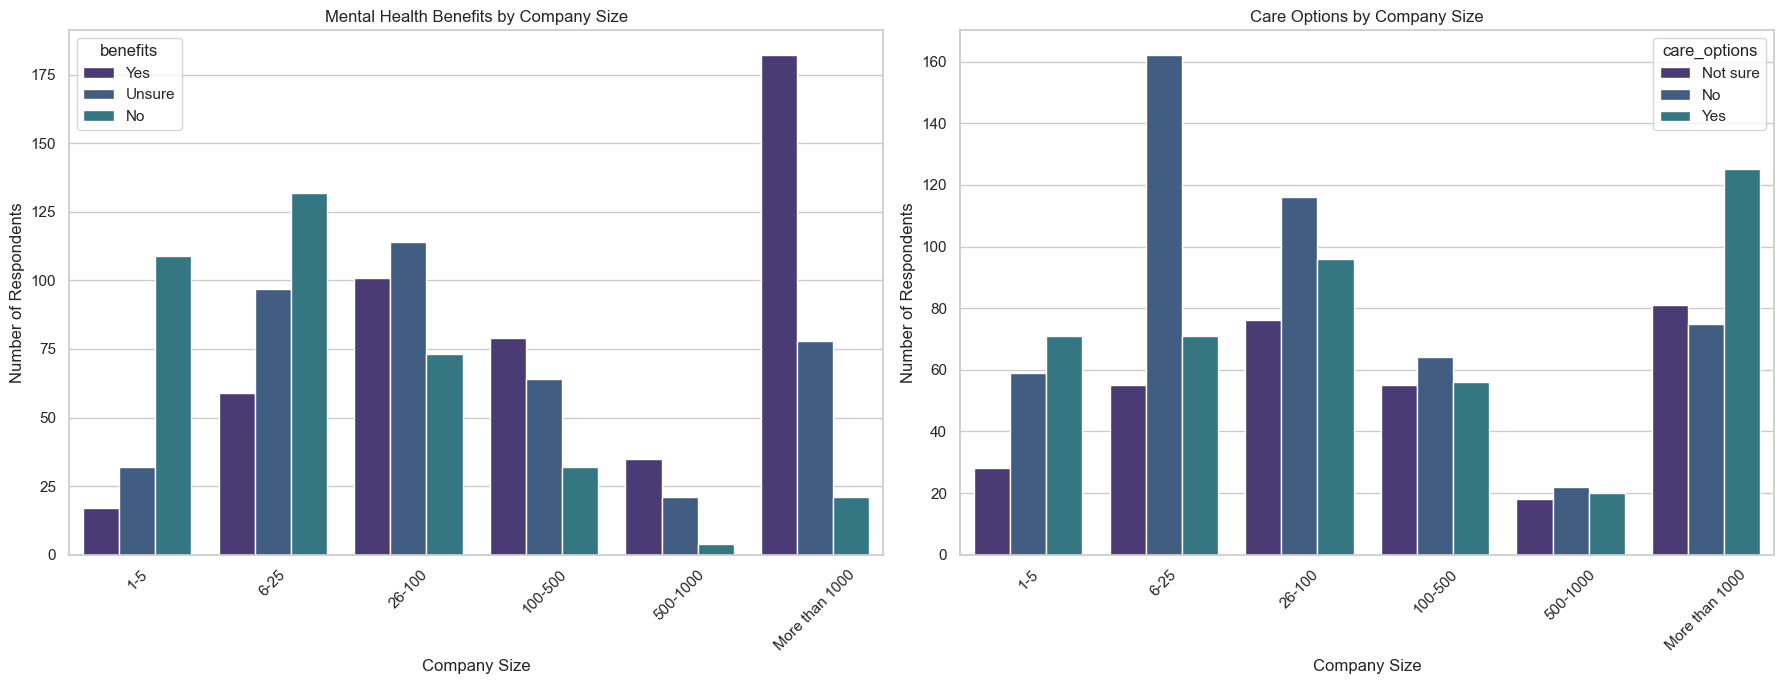

In [55]:
# Ensure company_size column is properly ordered
df['company_size'] = df['company_size'].replace("'More than 1000'", "More than 1000")
company_size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Plot benefits by company size
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.countplot(
    data=df,
    x='company_size',
    hue='benefits',
    order=company_size_order,   # enforce order here
    ax=axes[0]
)
axes[0].set_title('Mental Health Benefits by Company Size')
axes[0].set_xlabel('Company Size')
axes[0].set_ylabel('Number of Respondents')
axes[0].tick_params(axis='x', rotation=45)

# Plot care options by company size
sns.countplot(
    data=df,
    x='company_size',
    hue='care_options',
    order=company_size_order,   # enforce order here
    ax=axes[1]
)
axes[1].set_title('Care Options by Company Size')
axes[1].set_xlabel('Company Size')
axes[1].set_ylabel('Number of Respondents')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 

# 

## Workplace Culture and Support - David 

Do remote workers have the same care options as in person workers? does it affect their work? 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Check what values exist in remote_work column first
print("Unique values in remote_work:", df['remote_work'].unique())
print("Value counts:")
print(df['remote_work'].value_counts())
print("\n" + "="*50)

Unique values in remote_work: ['no' 'yes']
Value counts:
remote_work
no     879
yes    371
Name: count, dtype: int64



Remote workers: 371
In-person workers: 879


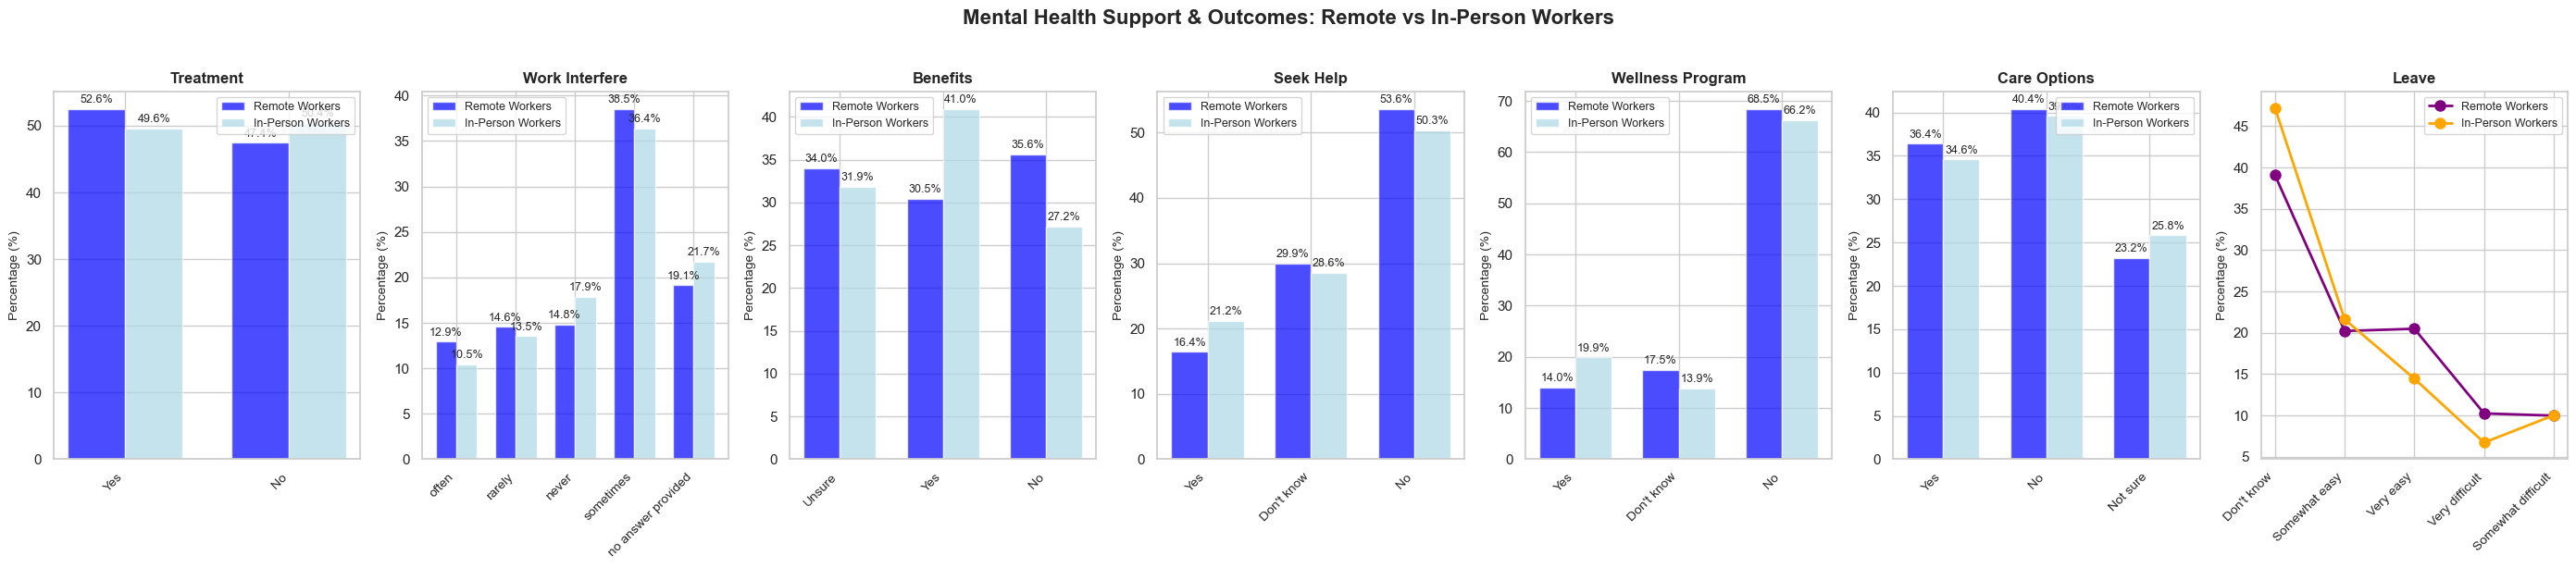

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter based on actual values
remote_workers = df[df['remote_work'] == 'yes']
inperson_workers = df[df['remote_work'] == 'no']

print(f"Remote workers: {len(remote_workers)}")
print(f"In-person workers: {len(inperson_workers)}")

# What we want to compare
columns = ['treatment', 'work_interfere', 'benefits', 'seek_help', 'wellness_program', 'care_options', 'leave']

# Create side-by-side comparison
fig, axes = plt.subplots(1, 7, figsize=(28, 6))

for i, col in enumerate(columns):
    # Get value counts for both groups
    remote_counts = remote_workers[col].value_counts()
    inperson_counts = inperson_workers[col].value_counts()
    
    # Convert to percentages for fair comparison
    remote_pct = (remote_counts / len(remote_workers)) * 100
    inperson_pct = (inperson_counts / len(inperson_workers)) * 100
    
    # Get all unique responses
    all_responses = list(set(remote_pct.index.tolist() + inperson_pct.index.tolist()))
    
    # Align the data
    remote_values = [remote_pct.get(resp, 0) for resp in all_responses]
    inperson_values = [inperson_pct.get(resp, 0) for resp in all_responses]
    
    if col == 'leave':
        # Make line plot for leave (difficulty scale)
        x = range(len(all_responses))
        axes[i].plot(x, remote_values, 'o-', color='purple', linewidth=2, markersize=8, label='Remote Workers')
        axes[i].plot(x, inperson_values, 'o-', color='orange', linewidth=2, markersize=8, label='In-Person Workers')
    else:
        # Make bar plot for others
        x = range(len(all_responses))
        width = 0.35
        
        axes[i].bar([p - width/2 for p in x], remote_values, width, 
                   color='blue', alpha=0.7, label='Remote Workers')
        axes[i].bar([p + width/2 for p in x], inperson_values, width, 
                   color='lightblue', alpha=0.7, label='In-Person Workers')
        
        # Add percentages on top of bars
        for j, (remote_val, inperson_val) in enumerate(zip(remote_values, inperson_values)):
            if remote_val > 0:
                axes[i].text(j - width/2, remote_val + max(remote_values + inperson_values) * 0.01, 
                            f'{remote_val:.1f}%', ha='center', va='bottom', fontsize=9)
            if inperson_val > 0:
                axes[i].text(j + width/2, inperson_val + max(remote_values + inperson_values) * 0.01, 
                            f'{inperson_val:.1f}%', ha='center', va='bottom', fontsize=9)
    
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[i].set_xticks(range(len(all_responses)))
    axes[i].set_xticklabels(all_responses, rotation=45, ha='right', fontsize=10)
    axes[i].legend(fontsize=9)
    axes[i].set_ylabel('Percentage (%)', fontsize=10)

plt.suptitle('Mental Health Support & Outcomes: Remote vs In-Person Workers', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Are people who report high fear of consequences less likely to say their workplace provides support

Stats Given there are observable consequences:
Care Options: Knowledge of mental health care options offered by the employer
care_options
Yes         83
No          66
Not sure    32
Name: count, dtype: int64
Benefits: Availability of mental health benefits provided by the employer
benefits
Yes       72
No        71
Unsure    38
Name: count, dtype: int64
Wellness Program: Inclusion of mental health discussions in employee wellness programs
wellness_program
No            121
Yes            45
Don't know     15
Name: count, dtype: int64
Leave: Ease of taking medical leave for a mental health condition
leave
Don't know            61
Somewhat difficult    42
Very difficult        33
Somewhat easy         30
Very easy             15
Name: count, dtype: int64
Seek Help: Availability of resources to learn about mental health and seeking help
seek_help
No            104
Yes            50
Don't know     27
Name: count, dtype: int64
Mental Health Consequence: Concerns about negative repercussion

C:\Users\azhan\AppData\Local\Temp\ipykernel_24164\2358438612.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors[:len(data)])
C:\Users\azhan\AppData\Local\Temp\ipykernel_24164\2358438612.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors[:len(data)])
C:\Users\azhan\AppData\Local\Temp\ipykernel_24164\2358438612.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors[:len(data)]

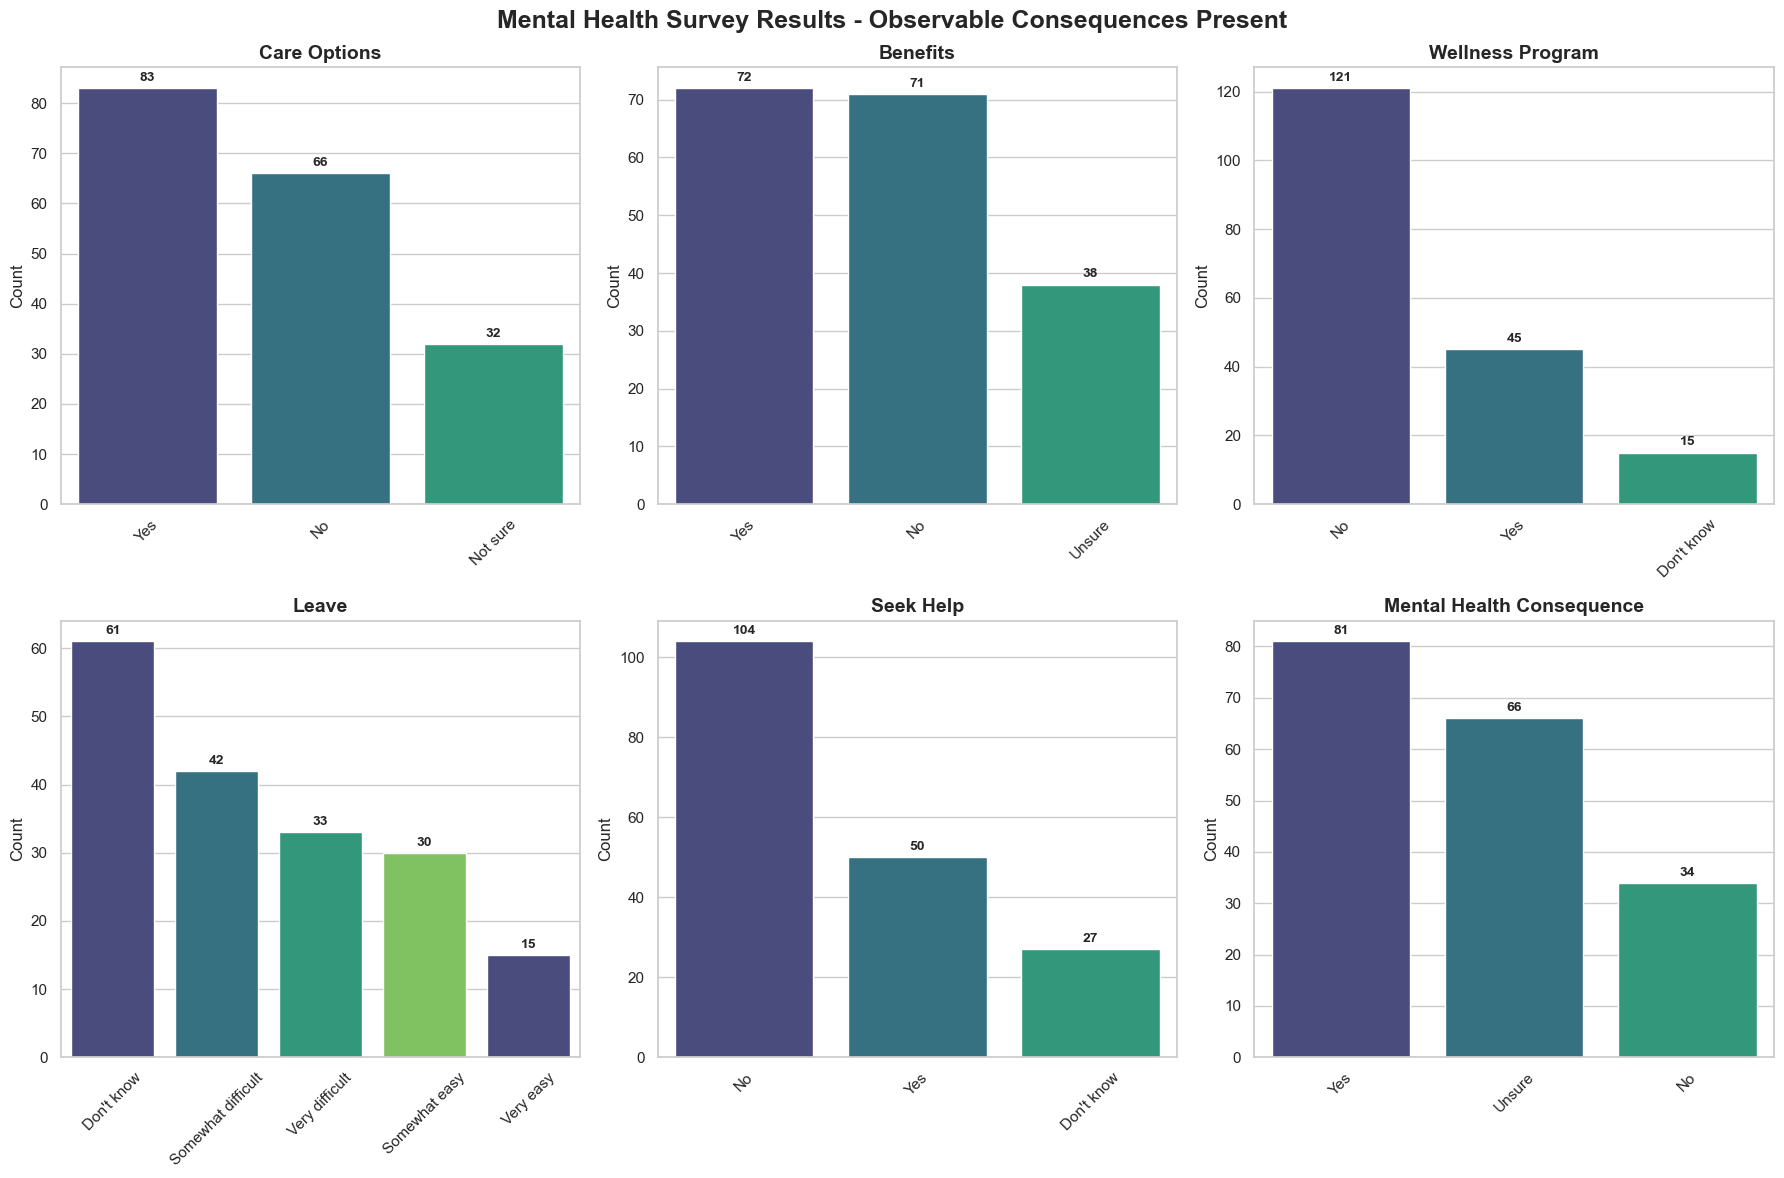

In [64]:
# Filter the DataFrame for rows where 'obs_consequence' is 'Yes'
obs_yes_df = df[df['obs_consequence'] == 'Yes']
print('Stats Given there are observable consequences:')

# Display value counts for 'care_options' column
care_options_counts = obs_yes_df['care_options'].value_counts()
print("Care Options: Knowledge of mental health care options offered by the employer")
print(care_options_counts)

# Display value counts for 'benefits' column
benefits_counts = obs_yes_df['benefits'].value_counts()
print("Benefits: Availability of mental health benefits provided by the employer")
print(benefits_counts)
  
# Display value counts for 'wellness_program' column
wellness_program_counts = obs_yes_df['wellness_program'].value_counts()
print("Wellness Program: Inclusion of mental health discussions in employee wellness programs")
print(wellness_program_counts)

# Display value counts for 'leave' column
leave_counts = obs_yes_df['leave'].value_counts()
print("Leave: Ease of taking medical leave for a mental health condition")
print(leave_counts)

# Display value counts for 'seek_help' column
seek_help_counts = obs_yes_df['seek_help'].value_counts()
print("Seek Help: Availability of resources to learn about mental health and seeking help")
print(seek_help_counts)

# Display value counts for 'mental_health_consequence' column
mental_health_consequence_counts = obs_yes_df['mental_health_consequence'].value_counts()
print("Mental Health Consequence: Concerns about negative repercussions from discussing mental health issues at work")
print(mental_health_consequence_counts)

# Create a cleaner, more focused visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# List of data and titles for cleaner iteration
data_list = [
    (care_options_counts, 'Care Options'),
    (benefits_counts, 'Benefits'),
    (wellness_program_counts, 'Wellness Program'),
    (leave_counts, 'Leave'),
    (seek_help_counts, 'Seek Help'),
    (mental_health_consequence_counts, 'Mental Health Consequence')
]

# Color palette for consistency
colors = sns.color_palette("viridis", 4)

for i, (data, title) in enumerate(data_list):
    # Use vertical bars as requested
    sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors[:len(data)])
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for j, v in enumerate(data.values):
        axes[i].text(j, v + max(data.values)*0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.suptitle('Mental Health Survey Results - Observable Consequences Present', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

Is anonymity more common in workplaces that also provide other forms of support?

Stats Given anonymity is Yes:
Wellness Program:
wellness_program
No            197
Yes           131
Don't know     44
Name: count, dtype: int64
Seek Help:
seek_help
No            170
Yes           145
Don't know     57
Name: count, dtype: int64
Care Options:
care_options
Yes         236
No           82
Not sure     54
Name: count, dtype: int64
Benefits:
benefits
Yes       226
No        104
Unsure     42
Name: count, dtype: int64
Leave:
leave
Somewhat easy         108
Very easy             104
Don't know             98
Somewhat difficult     36
Very difficult         26
Name: count, dtype: int64
Observed Consequences:
obs_consequence
No     316
Yes     56
Name: count, dtype: int64


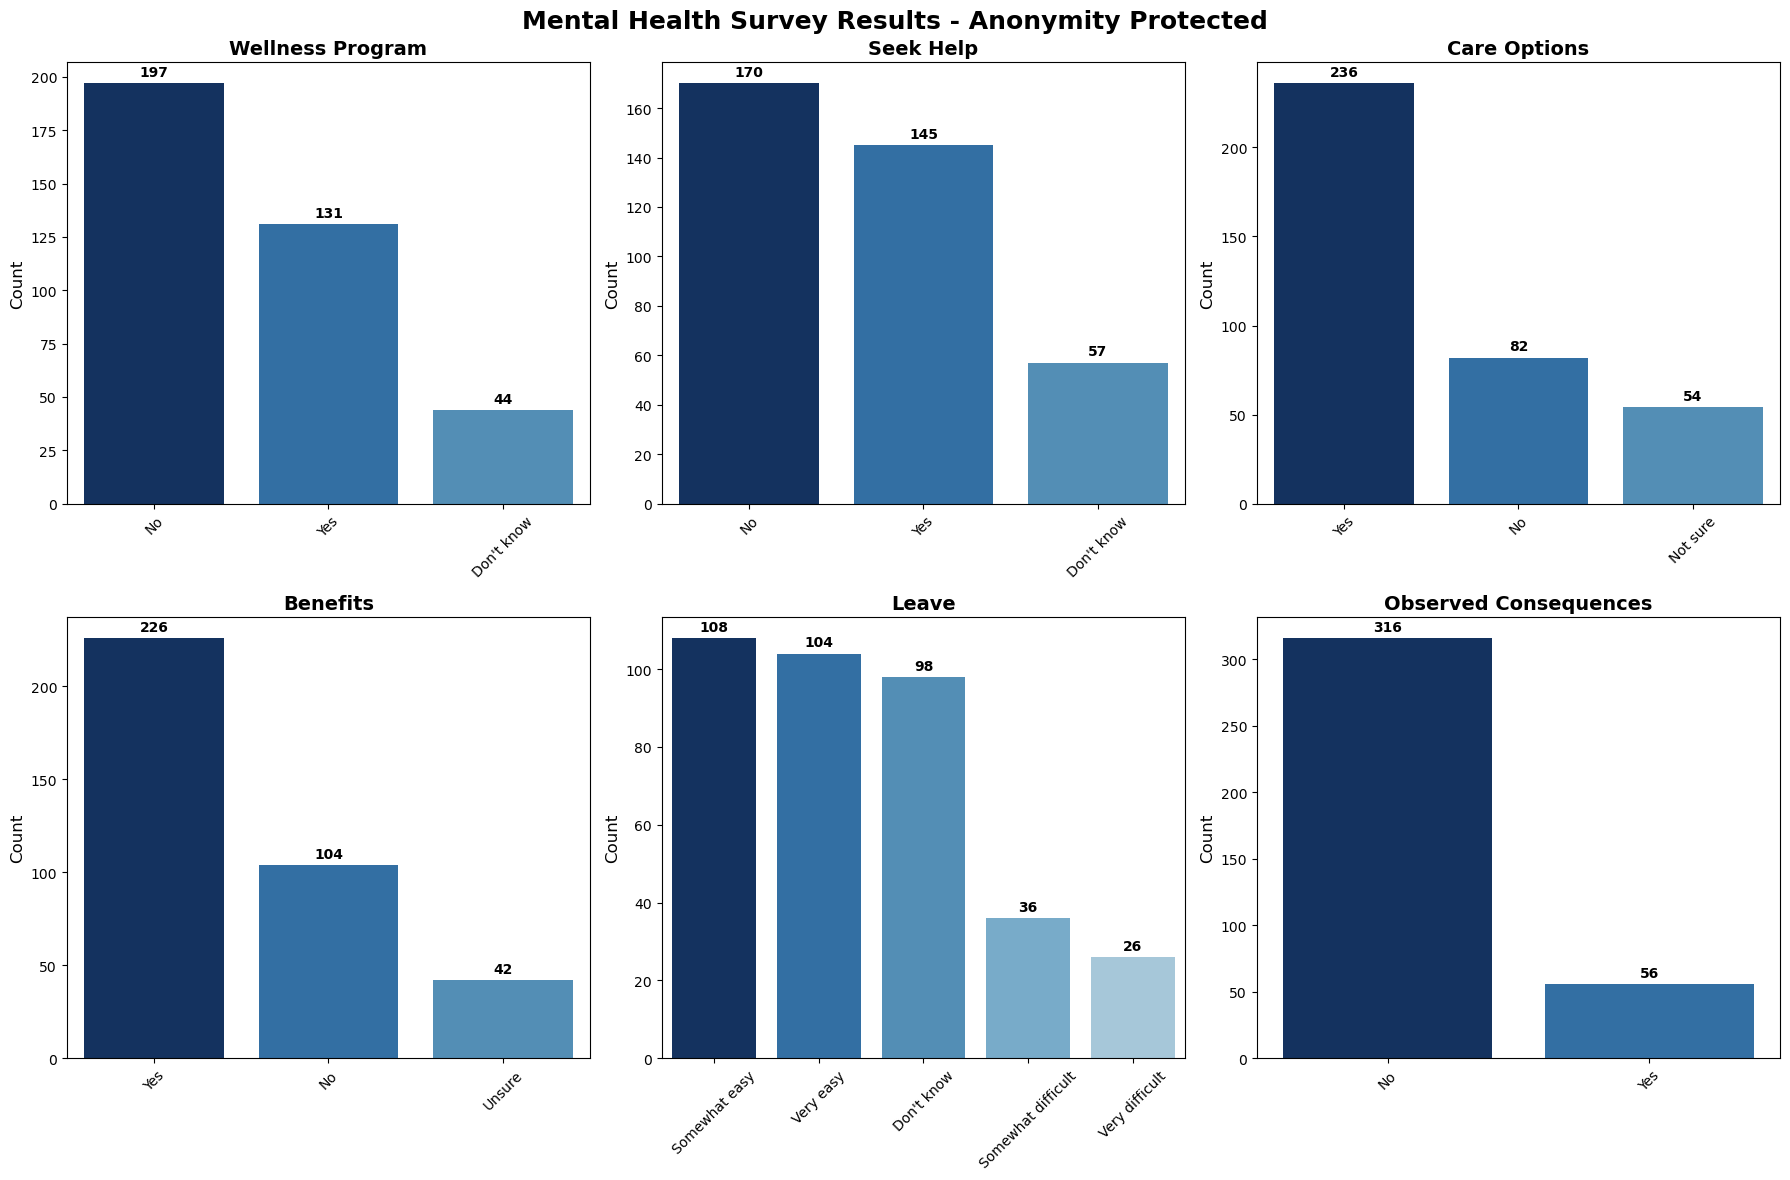


COMPARISON: Observed Consequences by Anonymity Status


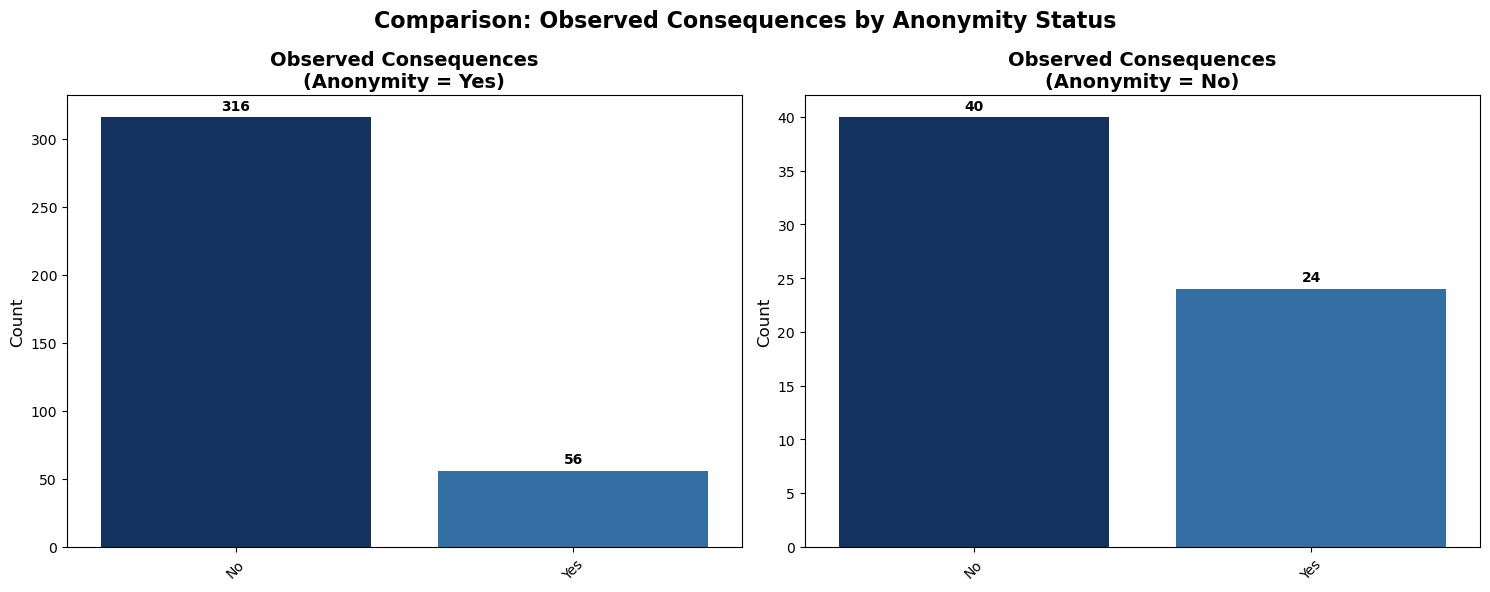


When Anonymity = Yes (372 respondents):
  - No: 316 (84.9%)
  - Yes: 56 (15.1%)

When Anonymity = No (64 respondents):
  - No: 40 (62.5%)
  - Yes: 24 (37.5%)


In [66]:
# Set style and blue color palette
plt.style.use('default')
blue_palette = ['#08306b', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7']

# Filter the DataFrame for rows where 'anonymity' is 'Yes'
anonymity_yes_df = df[df['anonymity'] == 'Yes']
print('Stats Given anonymity is Yes:')

# Display value counts for 'wellness_program' column
wellness_program_counts_anonymity_yes = anonymity_yes_df['wellness_program'].value_counts()
print("Wellness Program:")
print(wellness_program_counts_anonymity_yes)

# Display value counts for 'seek_help' column
seek_help_counts_anonymity_yes = anonymity_yes_df['seek_help'].value_counts()
print("Seek Help:")
print(seek_help_counts_anonymity_yes)

# Display value counts for 'care_options' column
care_options_counts_anonymity_yes = anonymity_yes_df['care_options'].value_counts()
print("Care Options:")
print(care_options_counts_anonymity_yes)

# Display value counts for 'benefits' column
benefits_counts_anonymity_yes = anonymity_yes_df['benefits'].value_counts()
print("Benefits:")
print(benefits_counts_anonymity_yes)

# Display value counts for 'leave' column
leave_counts_anonymity_yes = anonymity_yes_df['leave'].value_counts()
print("Leave:")
print(leave_counts_anonymity_yes)

# Display value counts for 'obs_consequence' column
obs_consequence_counts_anonymity_yes = anonymity_yes_df['obs_consequence'].value_counts()
print("Observed Consequences:")
print(obs_consequence_counts_anonymity_yes)

# Create a cleaner, more focused visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# List of data and titles for cleaner iteration
data_list = [
    (wellness_program_counts_anonymity_yes, 'Wellness Program'),
    (seek_help_counts_anonymity_yes, 'Seek Help'),
    (care_options_counts_anonymity_yes, 'Care Options'),
    (benefits_counts_anonymity_yes, 'Benefits'),
    (leave_counts_anonymity_yes, 'Leave'),
    (obs_consequence_counts_anonymity_yes, 'Observed Consequences')
]

for i, (data, title) in enumerate(data_list):
    # Use blue palette with appropriate number of colors
    sns.barplot(x=data.index, y=data.values, ax=axes[i], 
                palette=blue_palette[:len(data)], hue=data.index, legend=False)
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for j, v in enumerate(data.values):
        axes[i].text(j, v + max(data.values)*0.01, str(v),
                     ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.suptitle('Mental Health Survey Results - Anonymity Protected', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Additional analysis: Compare observed consequences between anonymity groups
print("\n" + "="*60)
print("COMPARISON: Observed Consequences by Anonymity Status")
print("="*60)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Anonymity = Yes
anonymity_yes_obs = df[df['anonymity'] == 'Yes']['obs_consequence'].value_counts()
sns.barplot(x=anonymity_yes_obs.index, y=anonymity_yes_obs.values, 
            ax=axes[0], palette=blue_palette[:len(anonymity_yes_obs)], 
            hue=anonymity_yes_obs.index, legend=False)
axes[0].set_title('Observed Consequences\n(Anonymity = Yes)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

for j, v in enumerate(anonymity_yes_obs.values):
    axes[0].text(j, v + max(anonymity_yes_obs.values)*0.01, str(v),
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

# Anonymity = No
anonymity_no_obs = df[df['anonymity'] == 'No']['obs_consequence'].value_counts()
sns.barplot(x=anonymity_no_obs.index, y=anonymity_no_obs.values, 
            ax=axes[1], palette=blue_palette[:len(anonymity_no_obs)], 
            hue=anonymity_no_obs.index, legend=False)
axes[1].set_title('Observed Consequences\n(Anonymity = No)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

for j, v in enumerate(anonymity_no_obs.values):
    axes[1].text(j, v + max(anonymity_no_obs.values)*0.01, str(v),
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.suptitle('Comparison: Observed Consequences by Anonymity Status', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nWhen Anonymity = Yes ({len(anonymity_yes_df)} respondents):")
for outcome, count in anonymity_yes_obs.items():
    percentage = (count / len(anonymity_yes_df)) * 100
    print(f"  - {outcome}: {count} ({percentage:.1f}%)")

anonymity_no_df = df[df['anonymity'] == 'No']
print(f"\nWhen Anonymity = No ({len(anonymity_no_df)} respondents):")
for outcome, count in anonymity_no_obs.items():
    percentage = (count / len(anonymity_no_df)) * 100
    print(f"  - {outcome}: {count} ({percentage:.1f}%)")

Do employees at tech companies report more access to support and higher openness?

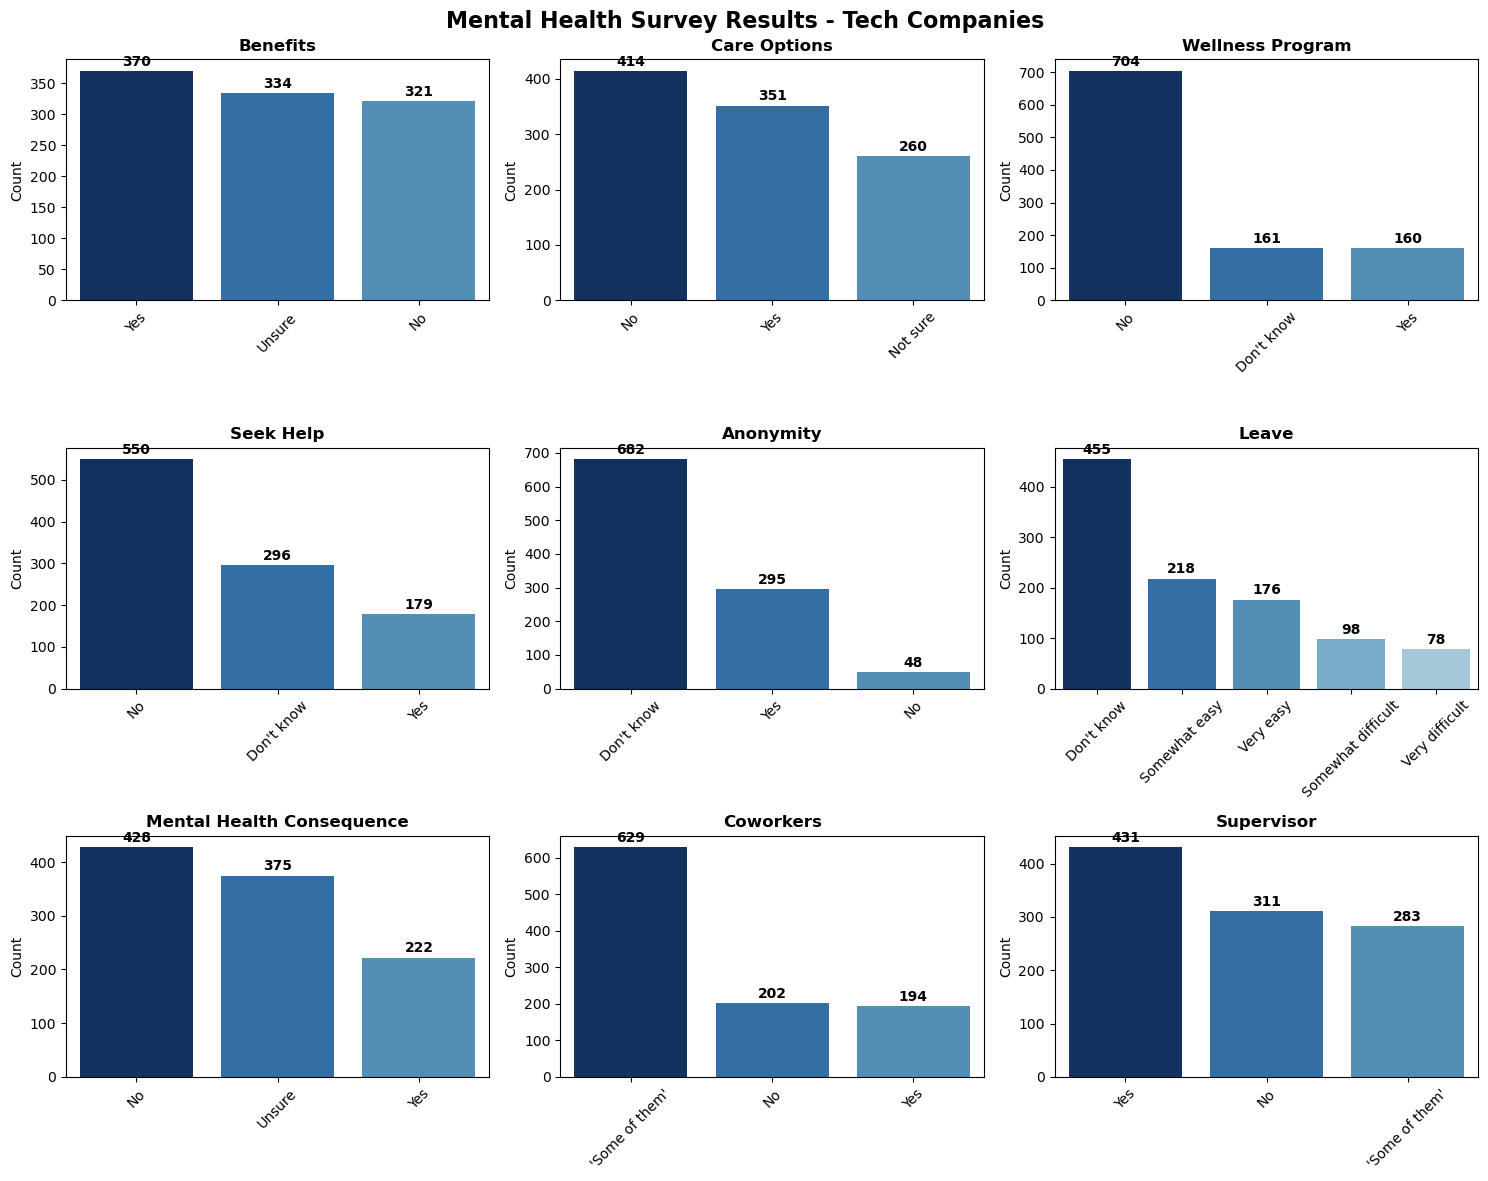

Tech Company Mental Health Survey Summary:
Total tech company respondents: 1025

Key findings:
- Benefits: 36.1% responded 'Yes'
- Care Options: 40.4% responded 'No'
- Wellness Program: 68.7% responded 'No'
- Seek Help: 53.7% responded 'No'
- Anonymity: 66.5% responded 'Don't know'
- Leave: 44.4% responded 'Don't know'
- Mental Health Consequence: 41.8% responded 'No'
- Coworkers: 61.4% responded ''Some of them''
- Supervisor: 42.0% responded 'Yes'


In [68]:
# Set style and blue color palette
plt.style.use('default')
blue_palette = ['#08306b', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7']
sns.set_palette(blue_palette)

# Filter for tech companies
tc_df = df[df['tech_company'] == 'Yes']

# Define columns to analyze
columns = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',
           'leave', 'mental_health_consequence', 'coworkers', 'supervisor']

# Create a 3x3 subplot layout for better organization
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Mental Health Survey Results - Tech Companies', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

for i, col in enumerate(columns):
    # Get value counts
    data = tc_df[col].value_counts().sort_values(ascending=False)
    
    # Create bar plot with blue shades
    sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=blue_palette[:len(data)], hue=data.index, legend=False)
    
    # Customize subplot
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    
    # Rotate x-axis labels if they're long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for j, v in enumerate(data.values):
        axes[i].text(j, v + max(data.values)*0.01, str(v),
                    ha='center', va='bottom', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

# Summary statistics
print("Tech Company Mental Health Survey Summary:")
print("="*50)
print(f"Total tech company respondents: {len(tc_df)}")
print("\nKey findings:")
for col in columns:
    top_response = tc_df[col].value_counts().index[0]
    percentage = tc_df[col].value_counts().iloc[0] / len(tc_df[col].dropna()) * 100
    print(f"- {col.replace('_', ' ').title()}: {percentage:.1f}% responded '{top_response}'")

In [69]:
df['company_size'].value_counts()

company_size
6-25              288
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: count, dtype: int64

Large companies (100+ employees): 516
Small companies (under 100 employees): 734


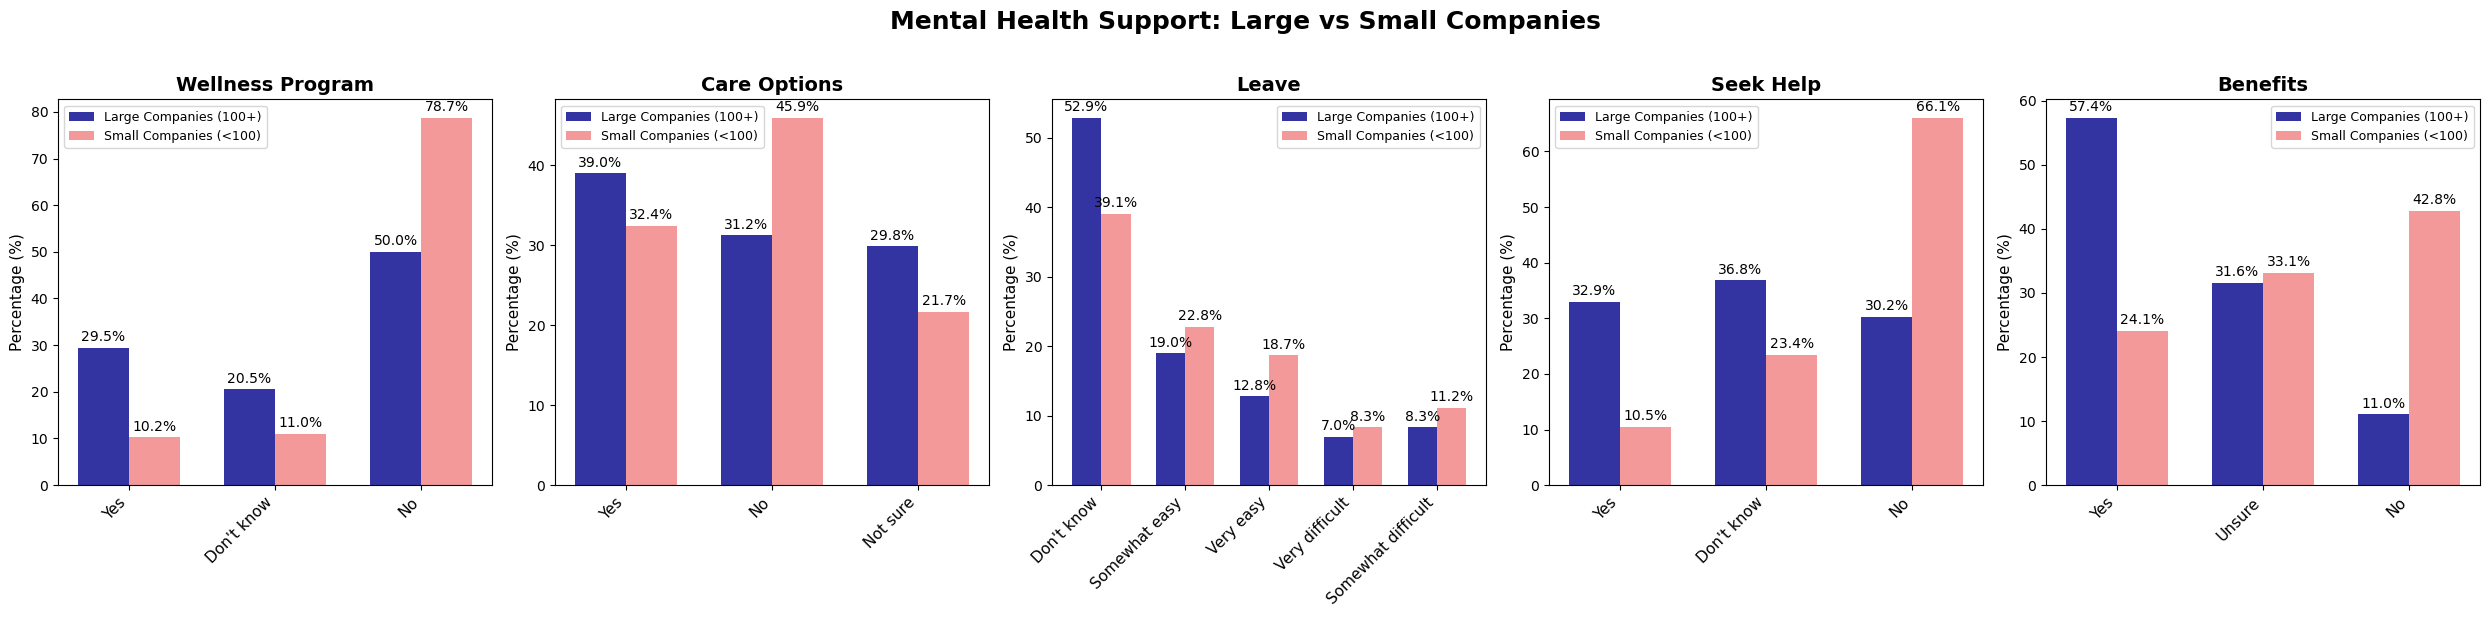

In [70]:
# Filter for large vs small companies
large_companies = df[df['company_size'].isin(['100-500', '500-1000', 'More than 1000'])]
small_companies = df[df['company_size'].isin(['1-5', '6-25', '26-100'])]

print(f"Large companies (100+ employees): {len(large_companies)}")
print(f"Small companies (under 100 employees): {len(small_companies)}")

# What we want to compare
columns = ['wellness_program', 'care_options', 'leave', 'seek_help', 'benefits']

# Create side-by-side comparison
fig, axes = plt.subplots(1, 5, figsize=(25, 6))

for i, col in enumerate(columns):
    # Get value counts for both groups
    large_counts = large_companies[col].value_counts()
    small_counts = small_companies[col].value_counts()
    
    # Convert to percentages
    large_pct = (large_counts / len(large_companies)) * 100
    small_pct = (small_counts / len(small_companies)) * 100
    
    # Get all unique responses
    all_responses = list(set(large_pct.index.tolist() + small_pct.index.tolist()))
    
    # Align the data
    large_values = [large_pct.get(resp, 0) for resp in all_responses]
    small_values = [small_pct.get(resp, 0) for resp in all_responses]
    
    # Plot bars side by side
    x = range(len(all_responses))
    width = 0.35
    
    axes[i].bar([p - width/2 for p in x], large_values, width, 
               color='darkblue', alpha=0.8, label='Large Companies (100+)')
    axes[i].bar([p + width/2 for p in x], small_values, width, 
               color='lightcoral', alpha=0.8, label='Small Companies (<100)')
    
    # Add percentages on top of bars
    for j, (large_val, small_val) in enumerate(zip(large_values, small_values)):
        if large_val > 0:
            axes[i].text(j - width/2, large_val + max(large_values + small_values) * 0.01, 
                        f'{large_val:.1f}%', ha='center', va='bottom', fontsize=10)
        if small_val > 0:
            axes[i].text(j + width/2, small_val + max(large_values + small_values) * 0.01, 
                        f'{small_val:.1f}%', ha='center', va='bottom', fontsize=10)
    
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=14, fontweight='bold')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(all_responses, rotation=45, ha='right', fontsize=11)
    axes[i].legend(fontsize=9)
    axes[i].set_ylabel('Percentage (%)', fontsize=11)

plt.suptitle('Mental Health Support: Large vs Small Companies', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

What do people who sought treatment ("Yes") have in common? And what about those who didn’t ("No")?


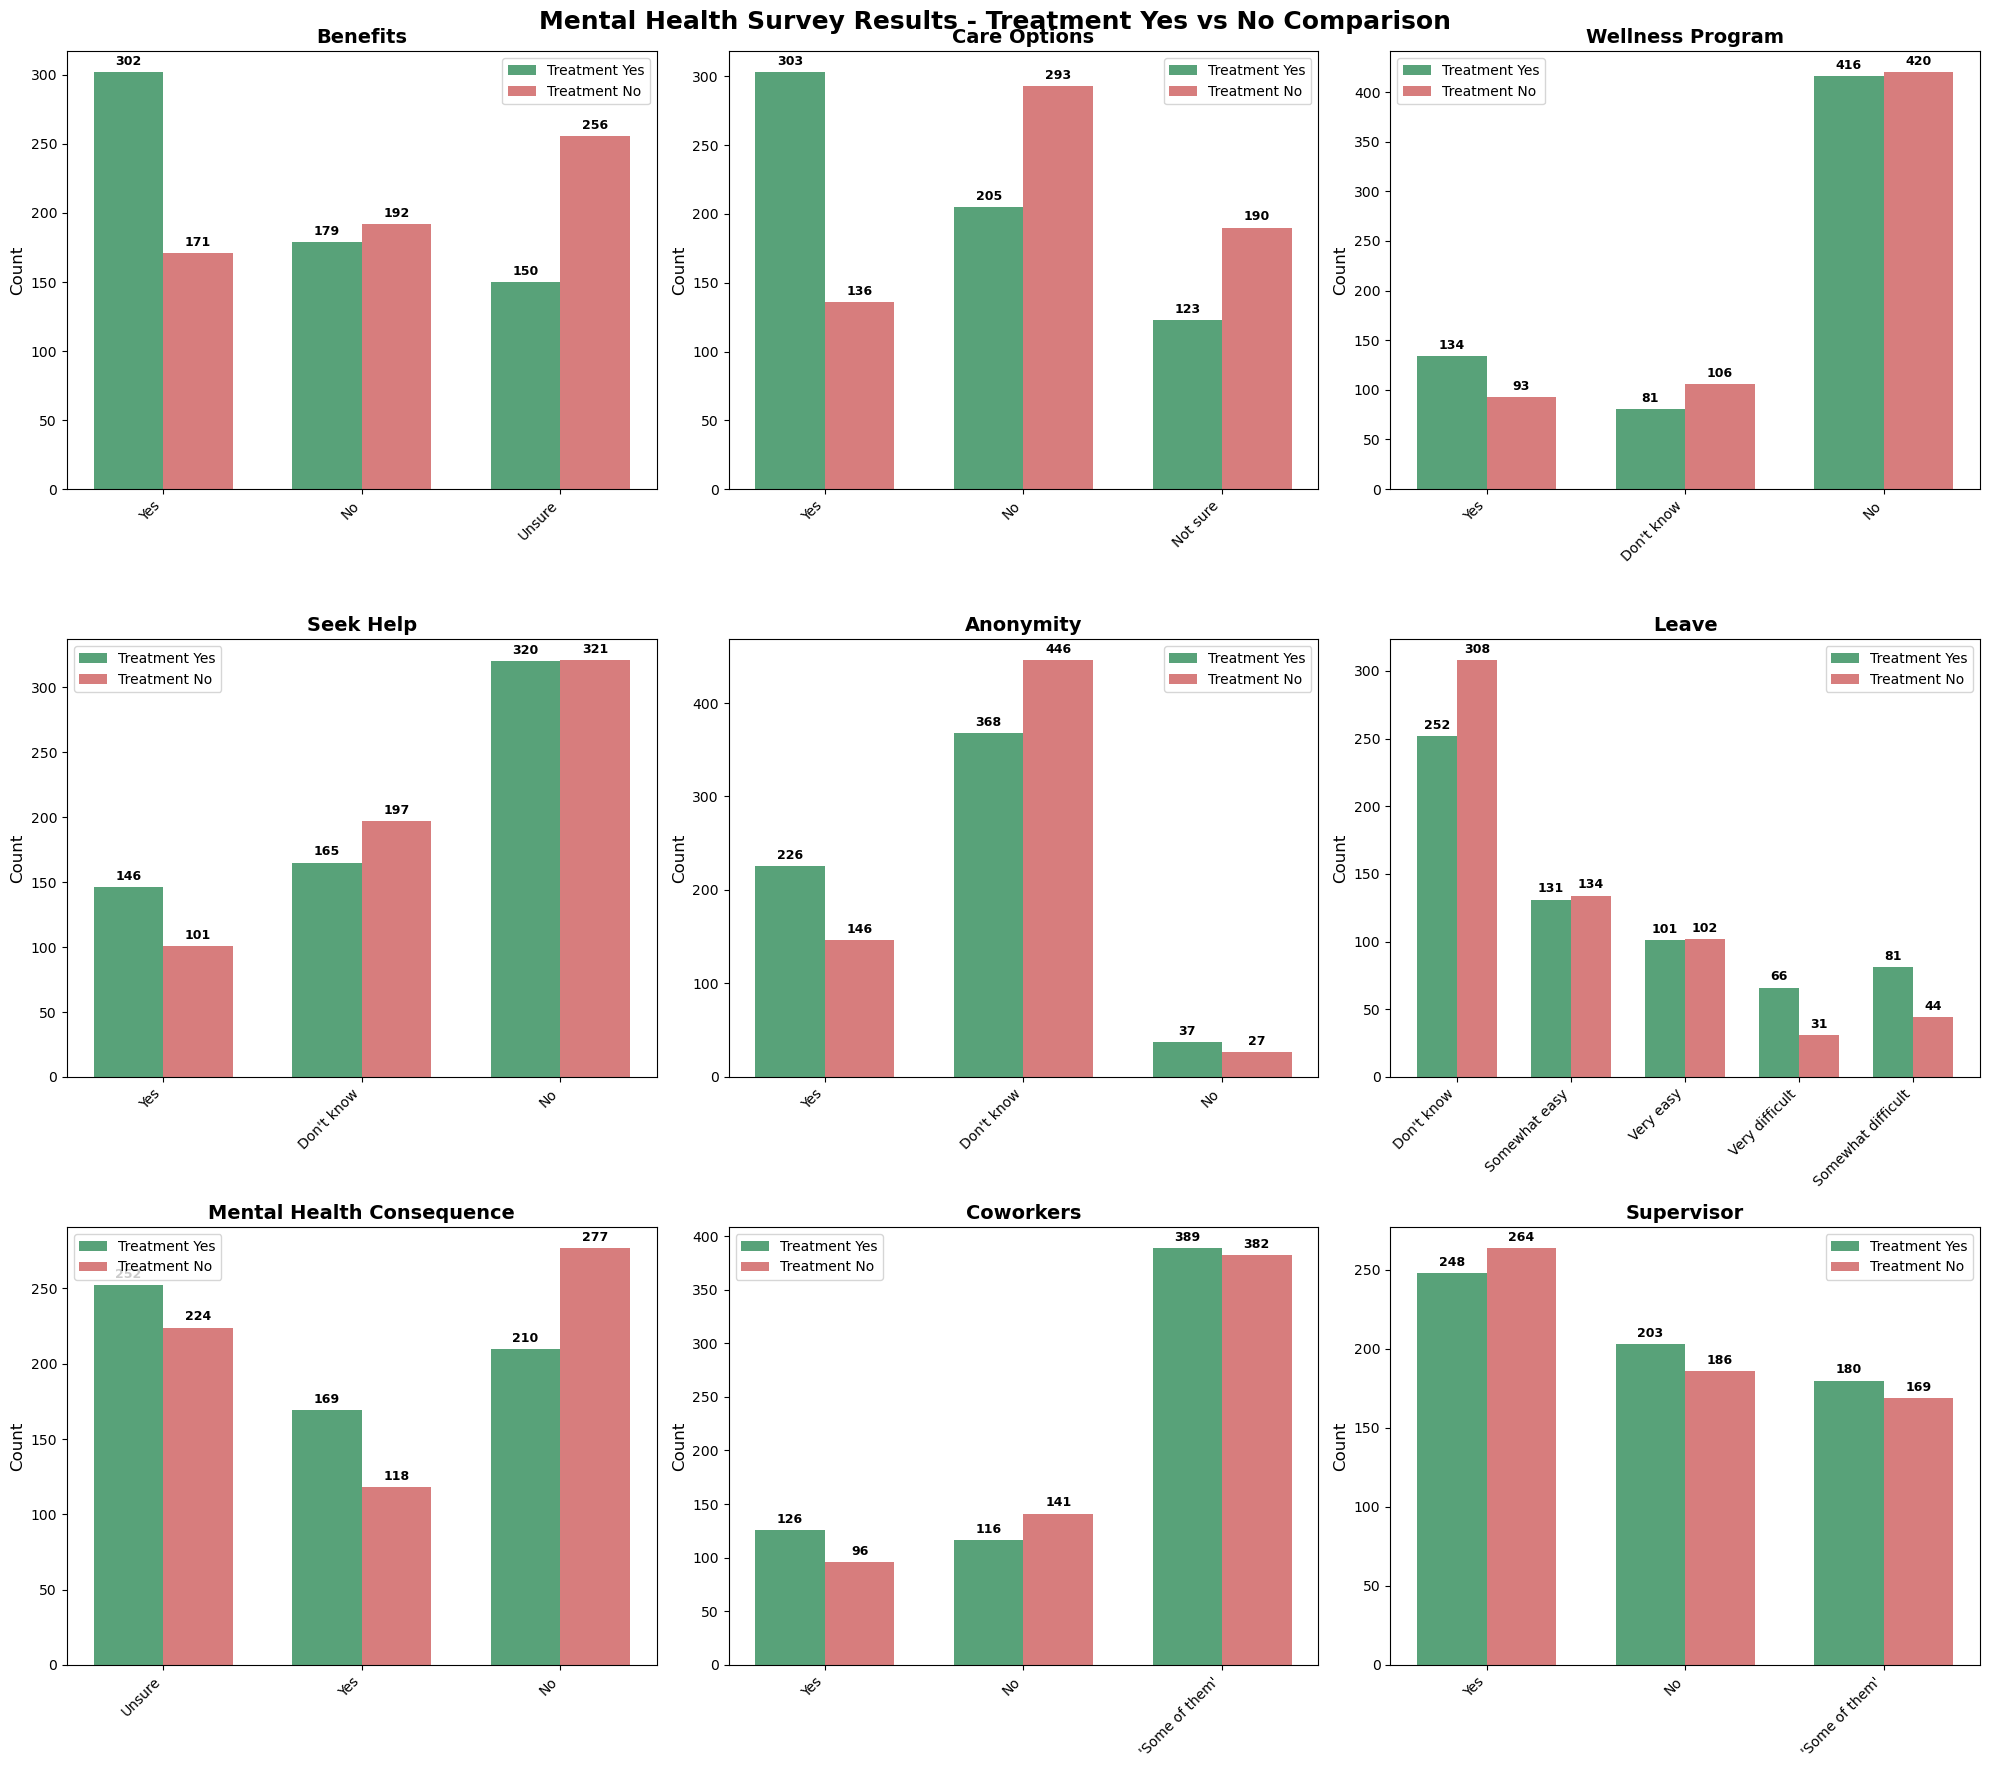

In [72]:

# Filter the DataFrame for rows where 'treatment' is 'Yes'
treatment_yes_df = df[df['treatment'] == 'Yes']

# Filter the DataFrame for rows where 'treatment' is 'No'
treatment_no_df = df[df['treatment'] == 'No']

# Now, we can calculate value counts for each column for treatment 'Yes' and 'No'
benefits_counts_treatment_yes = treatment_yes_df['benefits'].value_counts()
care_options_counts_treatment_yes = treatment_yes_df['care_options'].value_counts()
wellness_program_counts_treatment_yes = treatment_yes_df['wellness_program'].value_counts()
seek_help_counts_treatment_yes = treatment_yes_df['seek_help'].value_counts()
anonymity_counts_treatment_yes = treatment_yes_df['anonymity'].value_counts()
leave_counts_treatment_yes = treatment_yes_df['leave'].value_counts()
mental_health_consequence_counts_treatment_yes = treatment_yes_df['mental_health_consequence'].value_counts()
coworkers_counts_treatment_yes = treatment_yes_df['coworkers'].value_counts()
supervisor_counts_treatment_yes = treatment_yes_df['supervisor'].value_counts()

benefits_counts_treatment_no = treatment_no_df['benefits'].value_counts()
care_options_counts_treatment_no = treatment_no_df['care_options'].value_counts()
wellness_program_counts_treatment_no = treatment_no_df['wellness_program'].value_counts()
seek_help_counts_treatment_no = treatment_no_df['seek_help'].value_counts()
anonymity_counts_treatment_no = treatment_no_df['anonymity'].value_counts()
leave_counts_treatment_no = treatment_no_df['leave'].value_counts()
mental_health_consequence_counts_treatment_no = treatment_no_df['mental_health_consequence'].value_counts()
coworkers_counts_treatment_no = treatment_no_df['coworkers'].value_counts()
supervisor_counts_treatment_no = treatment_no_df['supervisor'].value_counts()

# Create side-by-side comparison visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# List of all the data pairs and titles
data_pairs = [
    (benefits_counts_treatment_yes, benefits_counts_treatment_no, 'Benefits'),
    (care_options_counts_treatment_yes, care_options_counts_treatment_no, 'Care Options'),
    (wellness_program_counts_treatment_yes, wellness_program_counts_treatment_no, 'Wellness Program'),
    (seek_help_counts_treatment_yes, seek_help_counts_treatment_no, 'Seek Help'),
    (anonymity_counts_treatment_yes, anonymity_counts_treatment_no, 'Anonymity'),
    (leave_counts_treatment_yes, leave_counts_treatment_no, 'Leave'),
    (mental_health_consequence_counts_treatment_yes, mental_health_consequence_counts_treatment_no, 'Mental Health Consequence'),
    (coworkers_counts_treatment_yes, coworkers_counts_treatment_no, 'Coworkers'),
    (supervisor_counts_treatment_yes, supervisor_counts_treatment_no, 'Supervisor')
]

# Colors for treatment Yes vs No
colors = ['#2E8B57', '#CD5C5C']  # Green for Yes, Red for No

for i, (data_yes, data_no, title) in enumerate(data_pairs):
    # Get all unique categories from both datasets
    all_categories = list(set(data_yes.index.tolist() + data_no.index.tolist()))
    
    # Create aligned data for both groups
    yes_values = [data_yes.get(cat, 0) for cat in all_categories]
    no_values = [data_no.get(cat, 0) for cat in all_categories]
    
    # Set up bar positions
    x_pos = range(len(all_categories))
    width = 0.35
    
    # Create grouped bars
    bars1 = axes[i].bar([x - width/2 for x in x_pos], yes_values, width, 
                       label='Treatment Yes', color=colors[0], alpha=0.8)
    bars2 = axes[i].bar([x + width/2 for x in x_pos], no_values, width,
                       label='Treatment No', color=colors[1], alpha=0.8)
    
    # Customize the subplot
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(all_categories, rotation=45, ha='right')
    axes[i].legend()
    
    # Add count labels on bars
    for bar, value in zip(bars1, yes_values):
        if value > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(yes_values + no_values)*0.01,
                        str(value), ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    for bar, value in zip(bars2, no_values):
        if value > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(yes_values + no_values)*0.01,
                        str(value), ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('Mental Health Survey Results - Treatment Yes vs No Comparison', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

What do we see in people who say their mental health affects their work performance?


Unique values in work_interfere: ['often' 'rarely' 'never' 'sometimes' 'no answer provided']
Value counts: work_interfere
sometimes             463
no answer provided    262
never                 212
rarely                173
often                 140
Name: count, dtype: int64
People with HIGH work interference: 603
People with LOW work interference: 385


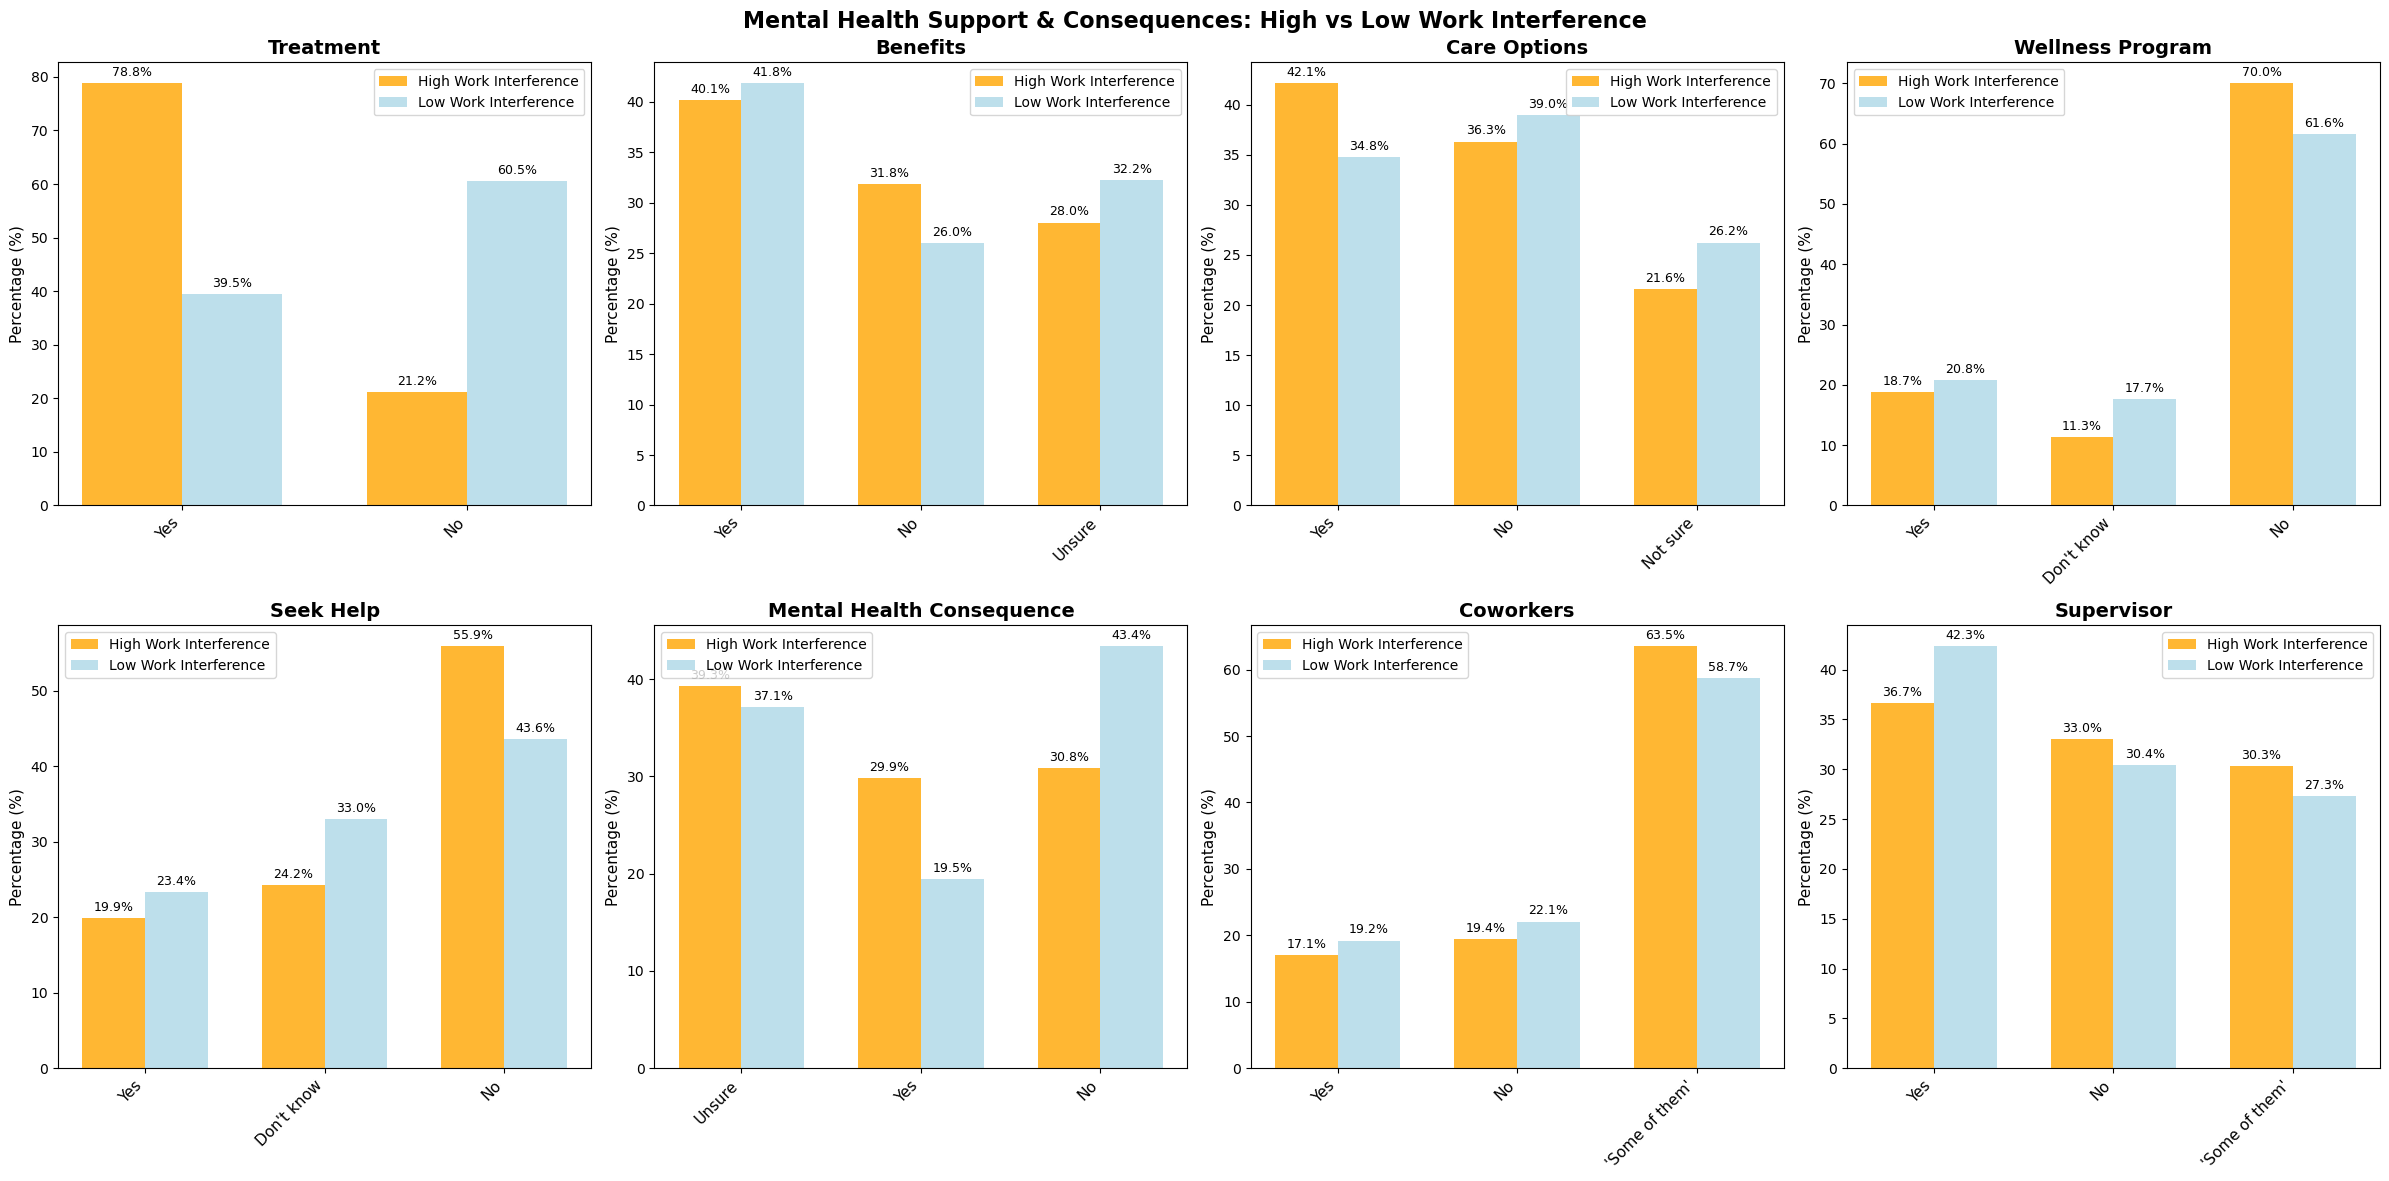

In [74]:
# Check what values exist in work_interfere column
print("Unique values in work_interfere:", df['work_interfere'].unique())
print("Value counts:", df['work_interfere'].value_counts())

# Filter for people with HIGH work interference (mental health affects work)
high_interference = df[df['work_interfere'].isin(['often', 'sometimes'])]

# Filter for people with LOW work interference (mental health doesn't affect work much)
low_interference = df[df['work_interfere'].isin(['never', 'rarely'])]

print(f"People with HIGH work interference: {len(high_interference)}")
print(f"People with LOW work interference: {len(low_interference)}")

# What we want to compare
columns_to_analyze = [
    'treatment',                    # Treatment seeking
    'benefits',                     # Workplace support access
    'care_options', 
    'wellness_program', 
    'seek_help',
    'mental_health_consequence',    # Mental health consequences/stigma
    'coworkers', 
    'supervisor'
]

# Create the comparison plots
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_analyze):
    # Count responses for each group
    high_counts = high_interference[col].value_counts()
    low_counts = low_interference[col].value_counts()
    
    # Convert to percentages
    high_pct = (high_counts / len(high_interference)) * 100
    low_pct = (low_counts / len(low_interference)) * 100
    
    # Get all unique responses
    all_responses = list(set(high_pct.index.tolist() + low_pct.index.tolist()))
    
    # Align the data
    high_values = [high_pct.get(resp, 0) for resp in all_responses]
    low_values = [low_pct.get(resp, 0) for resp in all_responses]
    
    # Plot bars side by side
    x = range(len(all_responses))
    width = 0.35
    
    axes[i].bar([p - width/2 for p in x], high_values, width, 
               color='orange', alpha=0.8, label='High Work Interference')
    axes[i].bar([p + width/2 for p in x], low_values, width, 
               color='lightblue', alpha=0.8, label='Low Work Interference')
    
    # Add percentages on top of bars
    for j, (high_val, low_val) in enumerate(zip(high_values, low_values)):
        if high_val > 0:
            axes[i].text(j - width/2, high_val + max(high_values + low_values) * 0.01, 
                        f'{high_val:.1f}%', ha='center', va='bottom', fontsize=9)
        if low_val > 0:
            axes[i].text(j + width/2, low_val + max(high_values + low_values) * 0.01, 
                        f'{low_val:.1f}%', ha='center', va='bottom', fontsize=9)
    
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=14, fontweight='bold')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(all_responses, rotation=45, ha='right', fontsize=11)
    axes[i].legend(fontsize=10)
    axes[i].set_ylabel('Percentage (%)', fontsize=11)

plt.suptitle('Mental Health Support & Consequences: High vs Low Work Interference', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

What do we see in people who have no access to mental health care options 

People with NO workplace mental health access: 183
People with SOME workplace mental health access: 664


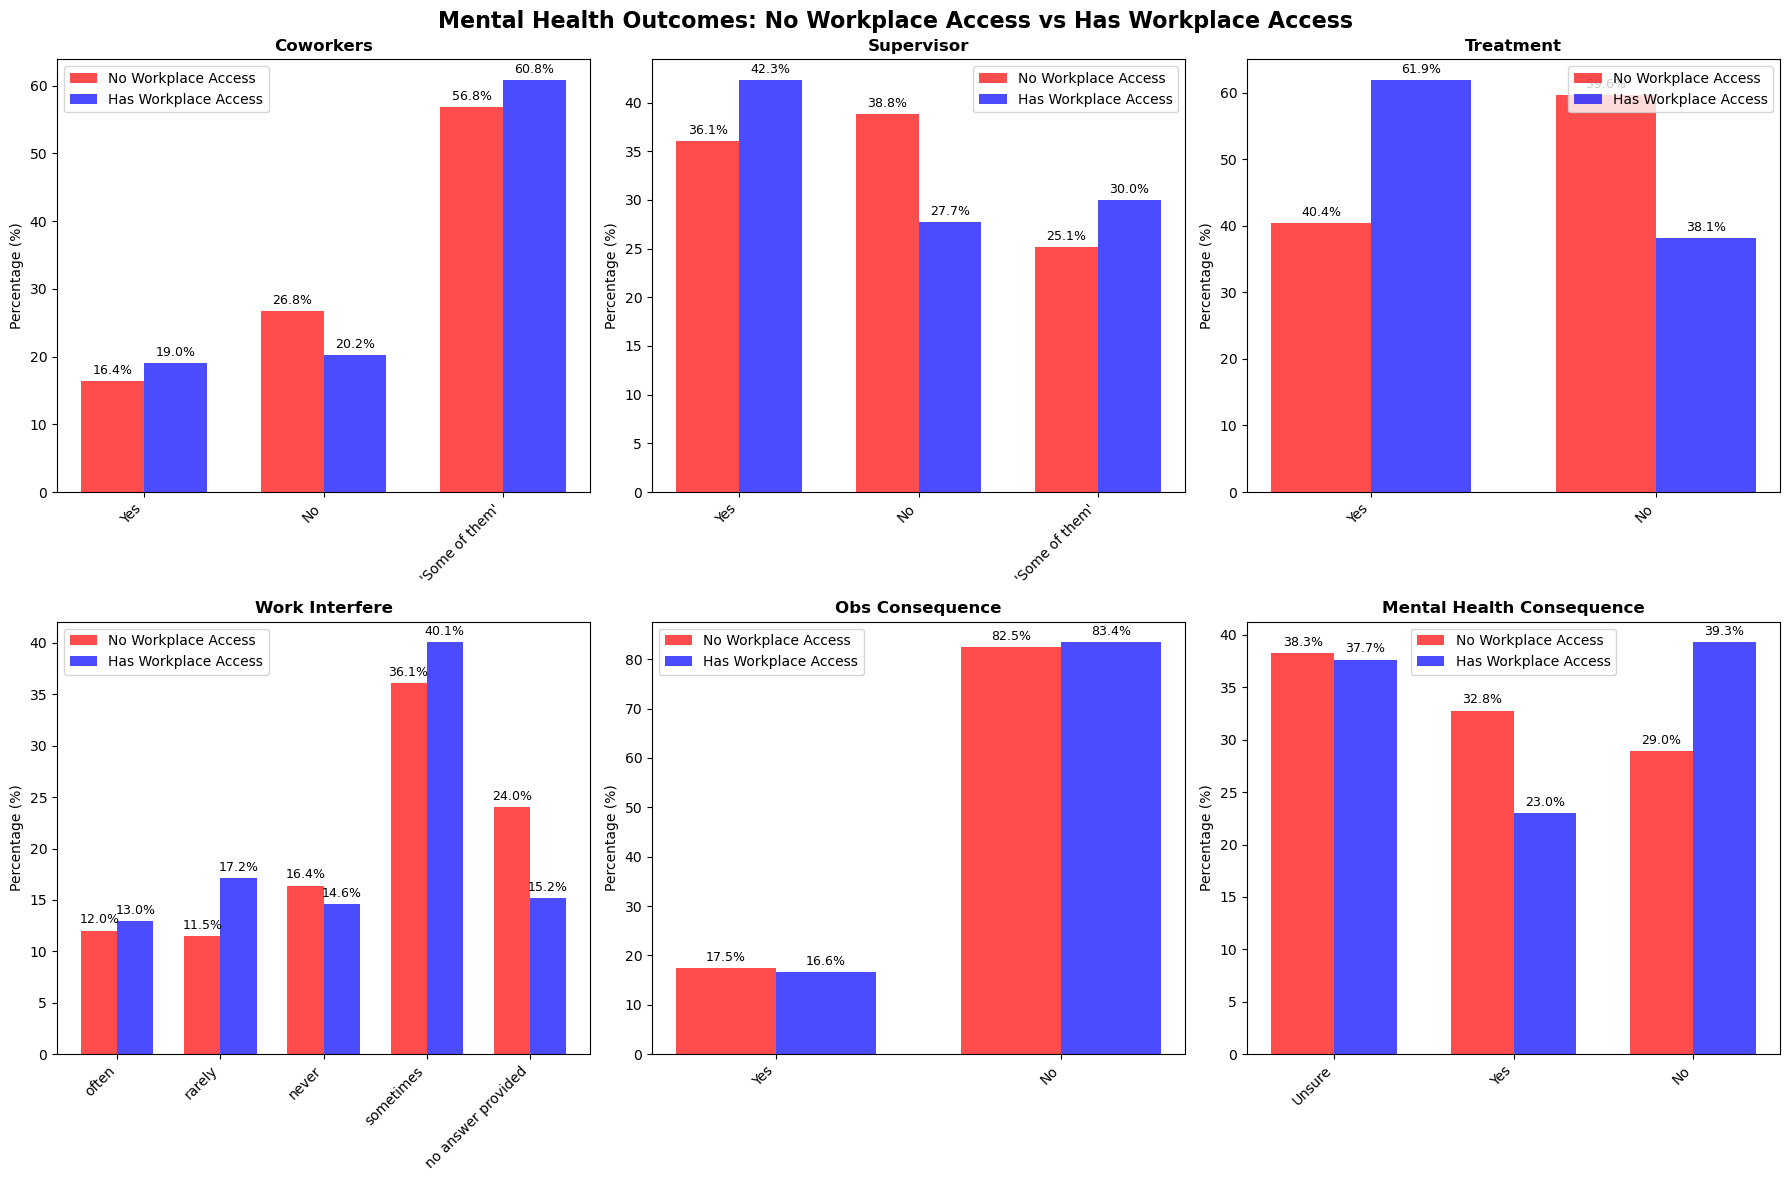

In [77]:

# These are people who answered 'No' to key workplace support questions
no_access = df[
    (df['benefits'] == 'No') & 
    (df['care_options'] == 'No') & 
    (df['wellness_program'] == 'No') & 
    (df['seek_help'] == 'No')
]

# Filter for people WITH access (at least some support)
has_access = df[
    (df['benefits'] == 'Yes') | 
    (df['care_options'] == 'Yes') | 
    (df['wellness_program'] == 'Yes') | 
    (df['seek_help'] == 'Yes')
]

print(f"People with NO workplace mental health access: {len(no_access)}")
print(f"People with SOME workplace mental health access: {len(has_access)}")

# What we want to compare
columns_to_analyze = [
    'coworkers',           # Are they talking to coworkers instead?
    'supervisor',          # Are they talking to supervisors instead?
    'treatment',           # Are they getting treatment elsewhere?
    'work_interfere',      # Are they struggling more at work?
    'obs_consequence',     # Do they see consequences for others?
    'mental_health_consequence'  # Are they worried about consequences?
]

# Create the comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_analyze):
    # Count responses for each group
    no_access_counts = no_access[col].value_counts()
    has_access_counts = has_access[col].value_counts()
    
    # Convert to percentages instead of raw counts
    no_access_pct = (no_access_counts / len(no_access)) * 100
    has_access_pct = (has_access_counts / len(has_access)) * 100
    
    # Get all unique responses
    all_responses = list(set(no_access_pct.index.tolist() + has_access_pct.index.tolist()))
    
    # Align the data
    no_access_values = [no_access_pct.get(resp, 0) for resp in all_responses]
    has_access_values = [has_access_pct.get(resp, 0) for resp in all_responses]
    
    # Plot bars side by side
    x = range(len(all_responses))
    width = 0.35
    
    axes[i].bar([p - width/2 for p in x], no_access_values, width, 
               color='red', alpha=0.7, label='No Workplace Access')
    axes[i].bar([p + width/2 for p in x], has_access_values, width, 
               color='blue', alpha=0.7, label='Has Workplace Access')
    
    # Add percentages on top of bars
    for j, (no_val, has_val) in enumerate(zip(no_access_values, has_access_values)):
        if no_val > 0:
            axes[i].text(j - width/2, no_val + max(no_access_values + has_access_values) * 0.01, 
                        f'{no_val:.1f}%', ha='center', va='bottom', fontsize=9)
        if has_val > 0:
            axes[i].text(j + width/2, has_val + max(no_access_values + has_access_values) * 0.01, 
                        f'{has_val:.1f}%', ha='center', va='bottom', fontsize=9)
    
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(all_responses, rotation=45, ha='right')
    axes[i].legend()
    axes[i].set_ylabel('Percentage (%)')

plt.suptitle('Mental Health Outcomes: No Workplace Access vs Has Workplace Access', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

Do self employed people offer mental health resources in their company? is their mental health affecting this in any way?


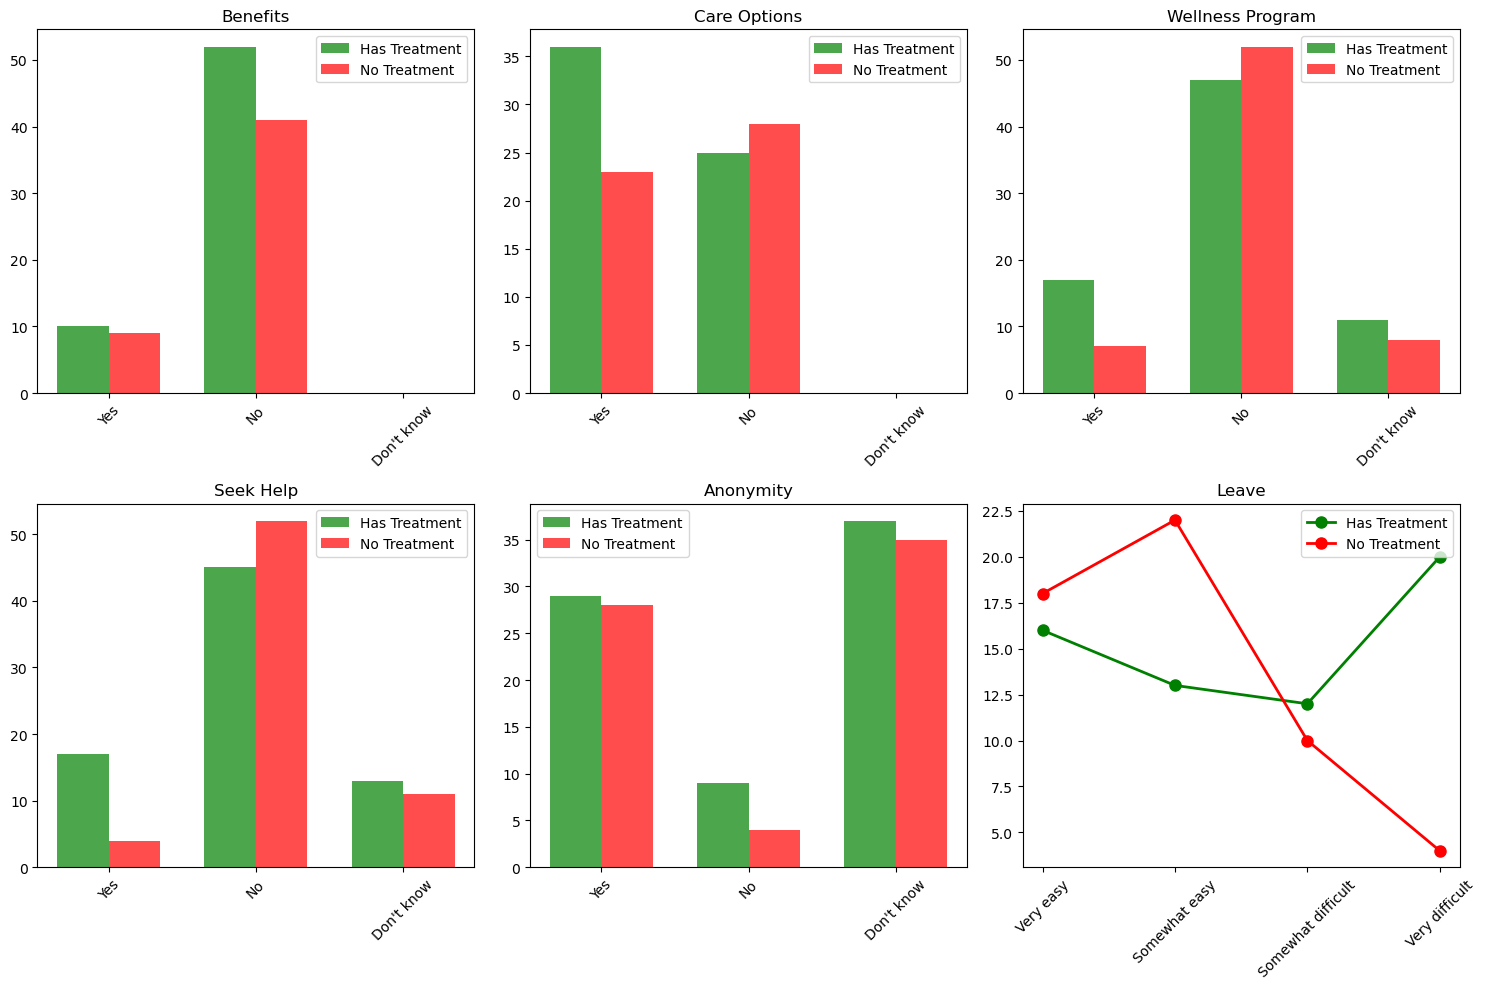

Do they offer Care options?
Has treatment: 36 out of 75
No treatment: 23 out of 67


In [79]:
# Filter for self-employed people
ceo = df[df['self_employed'] == 'Yes']

# Split into two groups
treatment_yes = ceo[ceo['treatment'] == 'Yes']
treatment_no = ceo[ceo['treatment'] == 'No']

# List of what we want to look at
columns = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave']

# Define the order we want for responses (different for leave)
def get_response_order(col):
    if col == 'leave':
        return ['Very easy', 'Somewhat easy', 'Somewhat difficult', 'Very difficult']
    else:
        return ['Yes', 'No', 'Don\'t know']

# Make 6 graphs
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    # Count responses for each group
    yes_counts = treatment_yes[col].value_counts()
    no_counts = treatment_no[col].value_counts()
    
    # Get the right response order for this column
    response_order = get_response_order(col)
    
    # Make sure both groups have same categories in same order
    yes_values = [yes_counts.get(cat, 0) for cat in response_order]
    no_values = [no_counts.get(cat, 0) for cat in response_order]
    
    if col == 'leave':
        # Make line plot for leave
        x = range(len(response_order))
        axes[i].plot(x, yes_values, 'o-', color='green', linewidth=2, markersize=8, label='Has Treatment')
        axes[i].plot(x, no_values, 'o-', color='red', linewidth=2, markersize=8, label='No Treatment')
    else:
        # Make bar plot for others
        x = range(len(response_order))
        width = 0.35
        axes[i].bar([p - width/2 for p in x], yes_values, width, color='green', alpha=0.7, label='Has Treatment')
        axes[i].bar([p + width/2 for p in x], no_values, width, color='red', alpha=0.7, label='No Treatment')
    
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xticks(range(len(response_order)))
    axes[i].set_xticklabels(response_order, rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Simple summary
print("Do they offer Care options?")
print("Has treatment:", (treatment_yes['care_options'] == 'Yes').sum(), "out of", len(treatment_yes))
print("No treatment:", (treatment_no['care_options'] == 'Yes').sum(), "out of", len(treatment_no))

### 

### 

# 

## Stigma and Openness

## 

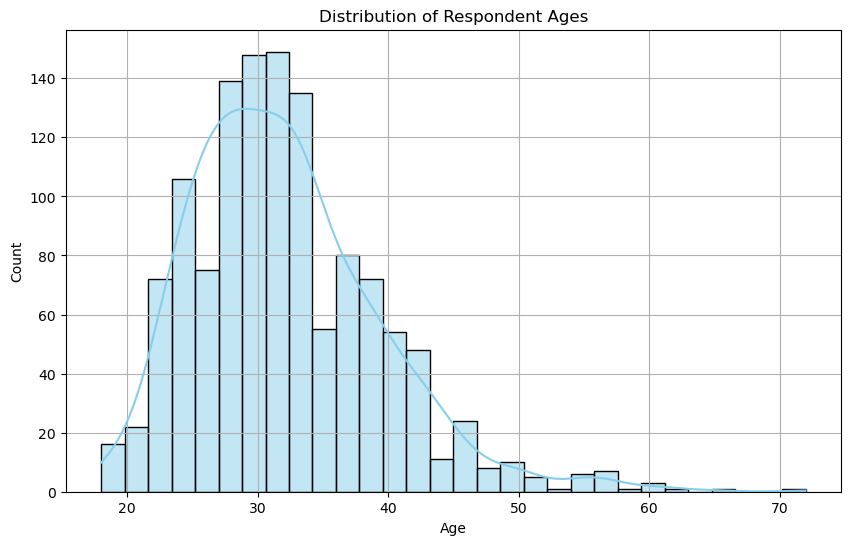

In [86]:
#Age distribution of responses
df_age_filtered = df[(df['Age'] > 0) & (df['Age'] < 100)]
plt.figure(figsize=(10, 6))
sns.histplot(df_age_filtered['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Respondent Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('age_distribution.png')

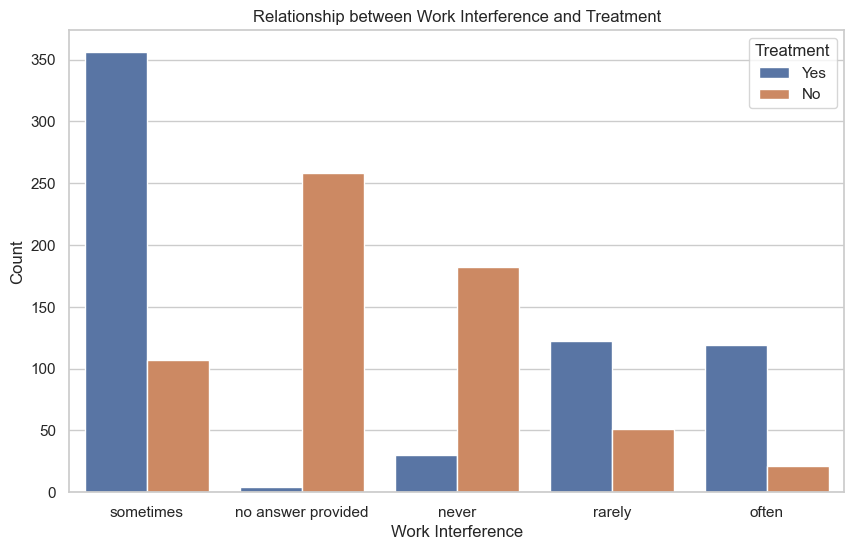

In [87]:
#The relationship between work interference and receiving treatment.
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_interfere', hue='treatment', order=df['work_interfere'].value_counts().index)
plt.title('Relationship between Work Interference and Treatment')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.savefig('work_interfere_treatment.png', bbox_inches='tight')
plt.show()

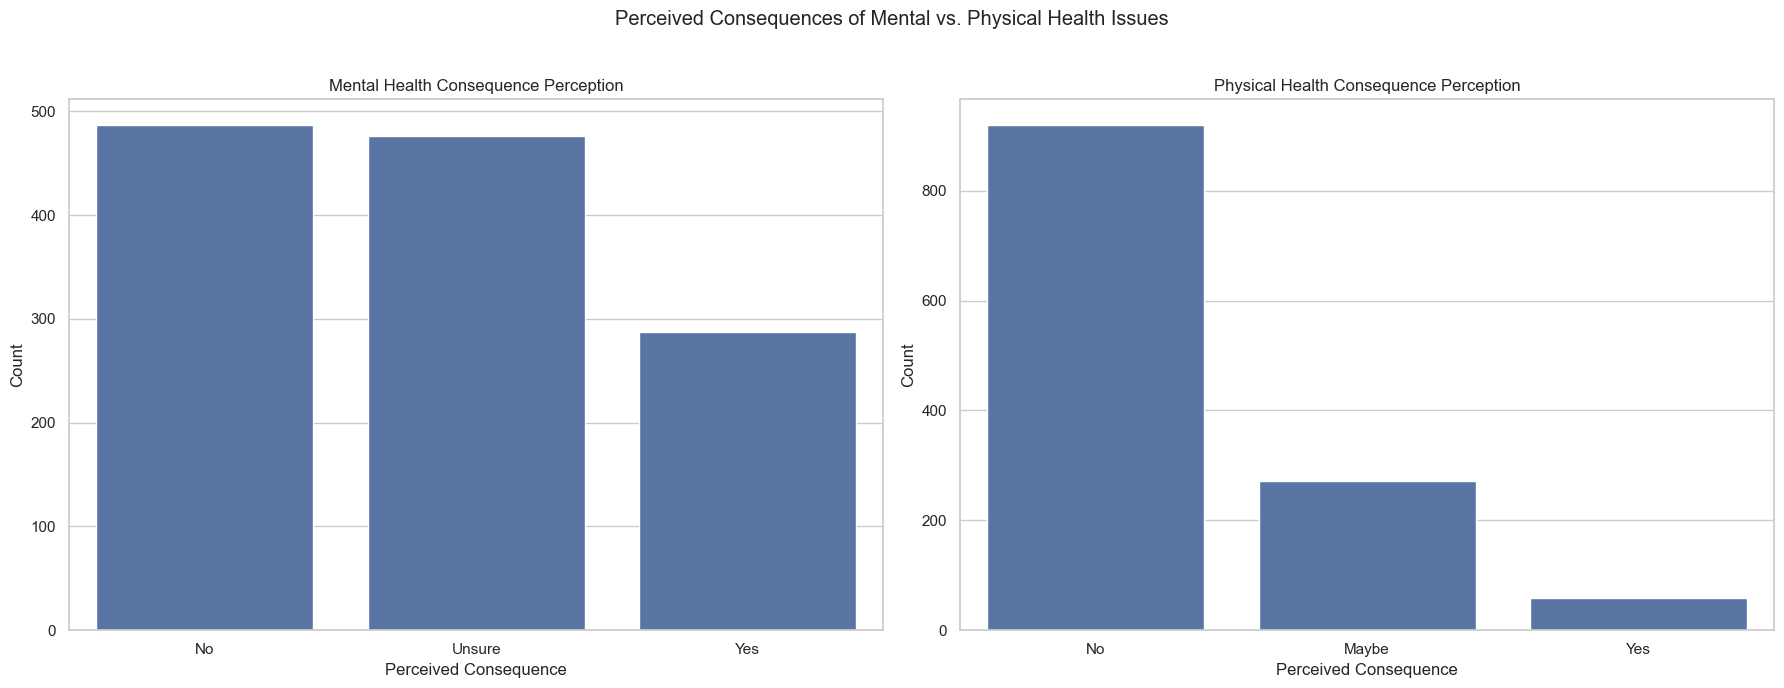

In [88]:
#Perceived Consequences of Mental vs. Physical Health Issues
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.countplot(data=df, x='mental_health_consequence', ax=axes[0], order=df['mental_health_consequence'].value_counts().index)
axes[0].set_title('Mental Health Consequence Perception')
axes[0].set_xlabel('Perceived Consequence')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='phys_health_consequence', ax=axes[1], order=df['phys_health_consequence'].value_counts().index)
axes[1].set_title('Physical Health Consequence Perception')
axes[1].set_xlabel('Perceived Consequence')
axes[1].set_ylabel('Count')
plt.suptitle('Perceived Consequences of Mental vs. Physical Health Issues')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('consequence_perception.png', bbox_inches='tight')
plt.show()

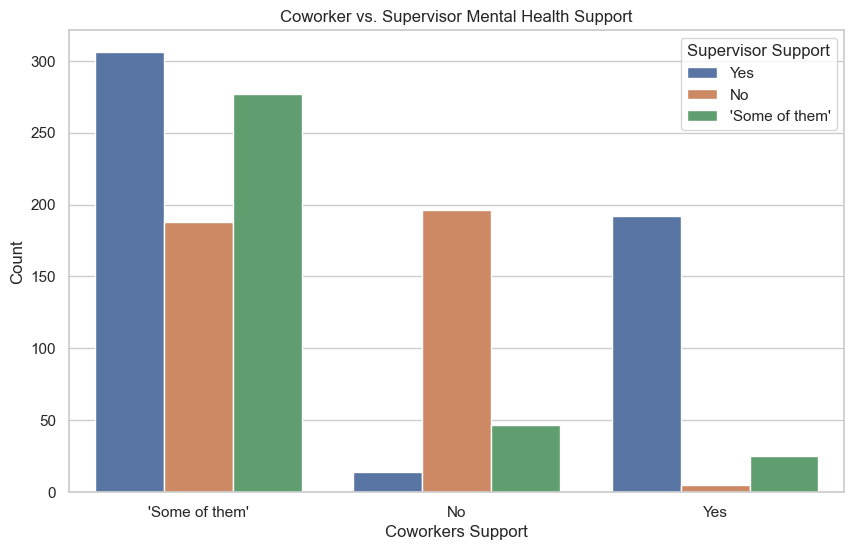

In [89]:
#Coworker and Supervisor Perceptions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coworkers', hue='supervisor', order=df['coworkers'].value_counts().index)
plt.title('Coworker vs. Supervisor Mental Health Support')
plt.xlabel('Coworkers Support')
plt.ylabel('Count')
plt.legend(title='Supervisor Support')
plt.savefig('coworkers_supervisor_support.png', bbox_inches='tight')
plt.show()

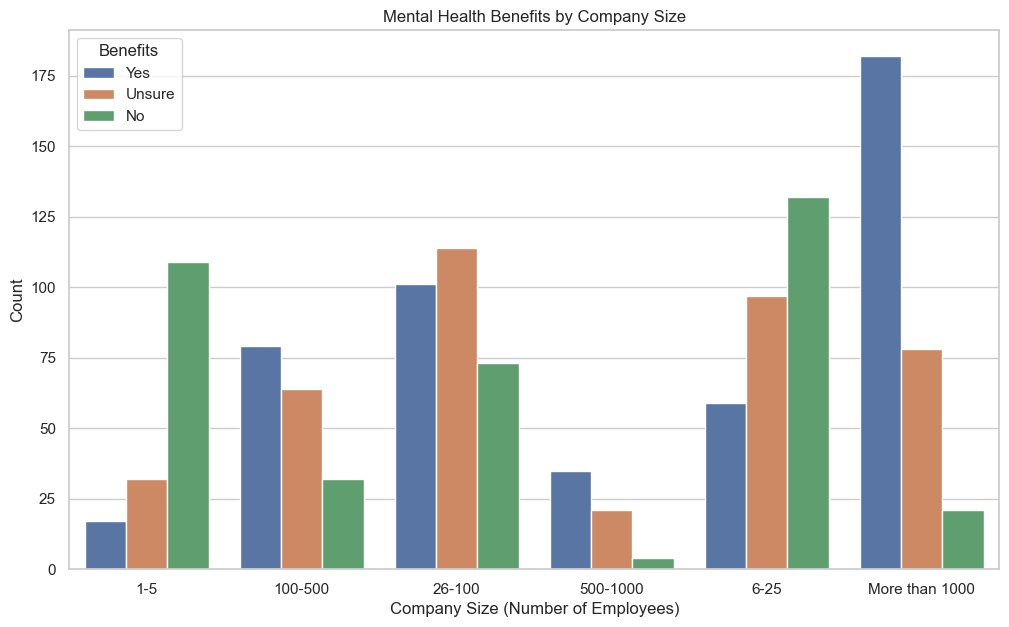

In [103]:
# Mental Health Benefits by Company Size
plt.figure(figsize=(12, 7))
sns.countplot(
    data=df,
    x='company_size', 
    hue='benefits', 
    order=sorted(df['company_size'].unique())
)
plt.title('Mental Health Benefits by Company Size')
plt.xlabel('Company Size (Number of Employees)')
plt.ylabel('Count')
plt.legend(title='Benefits')
plt.savefig('benefits_by_company_size.png', bbox_inches='tight')
plt.show()


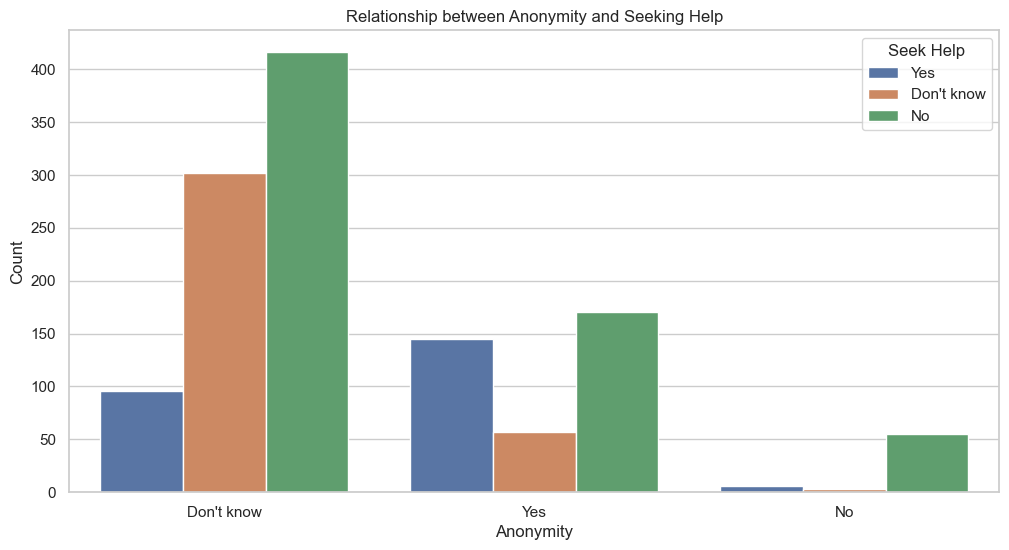

In [91]:
#Anonymity and Seeking Help
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='anonymity', hue='seek_help', order=df['anonymity'].value_counts().index)
plt.title('Relationship between Anonymity and Seeking Help')
plt.xlabel('Anonymity')
plt.ylabel('Count')
plt.legend(title='Seek Help')
plt.savefig('anonymity_seeking_help.png', bbox_inches='tight')
plt.show()

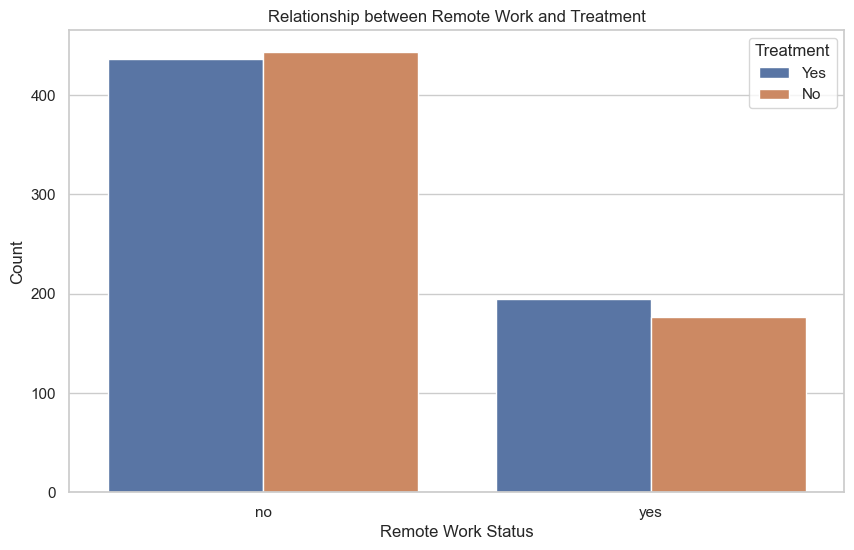

In [93]:
#Remote Work and Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='remote_work', hue='treatment', order=df['remote_work'].value_counts().index)
plt.title('Relationship between Remote Work and Treatment')
plt.xlabel('Remote Work Status')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.savefig('remote_work_treatment.png', bbox_inches='tight')
plt.show()

C:\Users\azhan\AppData\Local\Temp\ipykernel_24164\1514867211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


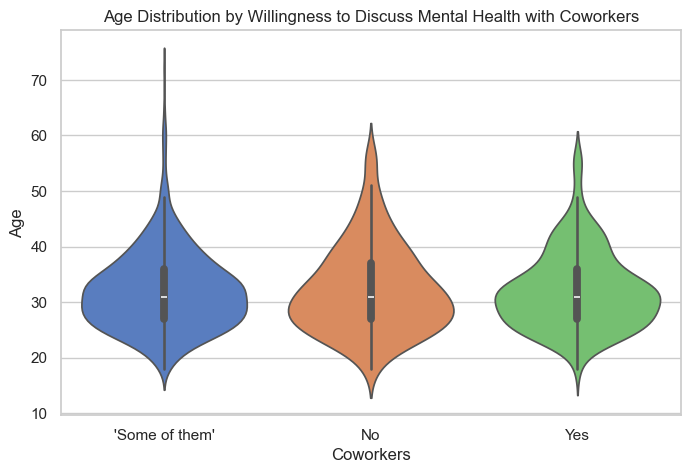

In [95]:
#Age distribution by openness to talking to coworkers
plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="coworkers",
    y="Age",
    palette="muted",
    order=df["coworkers"].value_counts().index
)
plt.title("Age Distribution by Willingness to Discuss Mental Health with Coworkers")
plt.xlabel("Coworkers")
plt.ylabel("Age")
plt.show()

C:\Users\azhan\AppData\Local\Temp\ipykernel_24164\328523460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='treatment', y='Age', data=df_filtered, palette='muted')


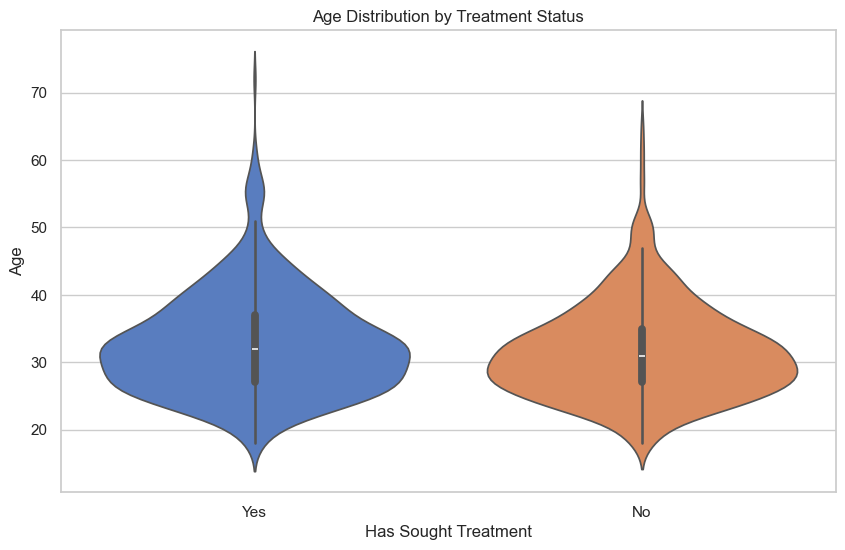

In [97]:
# Relationship between age and seeking treatment
df_filtered = df[(df['treatment'] != 'No Answer Provided') & (df['Age'] > 0)]
plt.figure(figsize=(10, 6))
sns.violinplot(x='treatment', y='Age', data=df_filtered, palette='muted')
plt.title('Age Distribution by Treatment Status')
plt.xlabel('Has Sought Treatment')
plt.ylabel('Age')
plt.savefig('age_treatment_violin_plot.png')


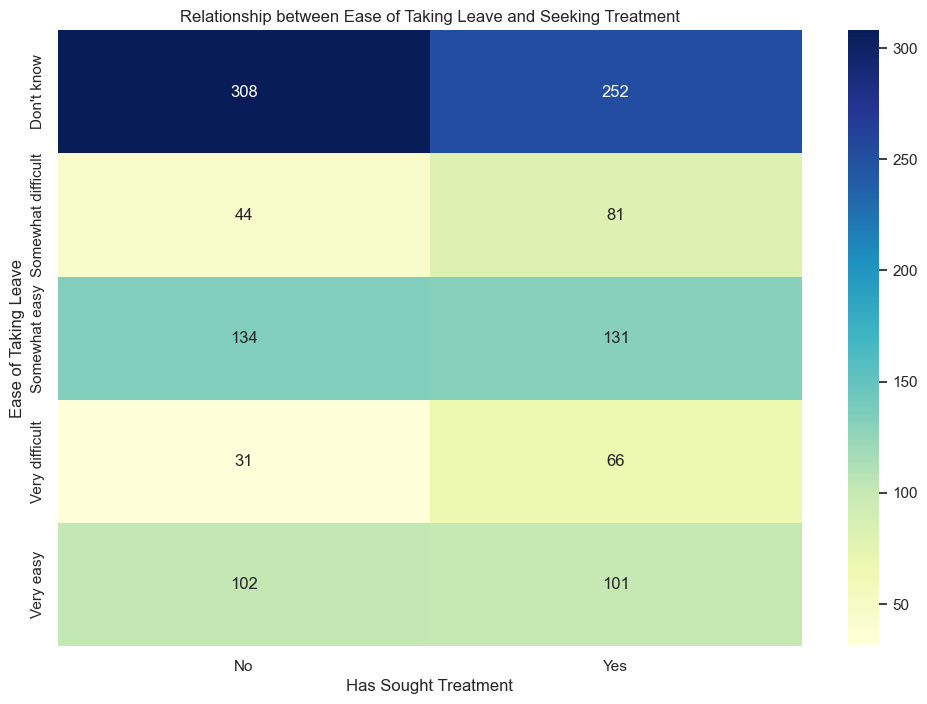

In [99]:
# Ease of taking leave and seeking treatment
crosstab_leave_treatment = pd.crosstab(df['leave'], df['treatment'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_leave_treatment, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relationship between Ease of Taking Leave and Seeking Treatment')
plt.xlabel('Has Sought Treatment')
plt.ylabel('Ease of Taking Leave')
plt.savefig('leave_treatment_heatmap.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=107fdcbe-478b-4664-bdb1-fc7b63bbe87e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>